# The impact of discrimination on inflammation: the MIDUS study

**Letian Huang**

# Introduction

Discrimination – differential treatment by individuals and social institutions based on characteristics such as race and class – has been associated with adverse health outcomes (Williams & Mohammed, 2009). A review of 29 meta-analyses and review papers has found that discrimination was related to mental health and physical health indicators such as health behaviors (Williams et al., 2019). To better understand how discrimination gets under the skin, in the past decade, research has increasingly highlighted low-grade inflammation – a prolonged and systemic state of unresolved inflammation – as a biological pathway connecting discrimination to later adverse health outcomes (León-Pedroza et al., 2015; Nathan & Ding, 2010). Self-reported everyday and lifetime discrimination has been linked to elevated inflammatory biomarkers such as C-reactive protein and IL-6 (Cuevas et al., 2020), which in turn predicts a broad range of health outcomes including cardiovascular diseases and cancer (Henein et al., 2022; Korniluk et al., 2017). Experiences of discrimination are stressful, and over time, they contribute to low-grade inflammation through biological and behavioral pathways (Berens et al., 2017). Biologically, adverse social exposures sensitize immune cells to have exaggerated inflammatory responses that are less sensitive to inhibition signals (Milller et al., 2011). Behaviorally, discrimination leads people to engage in health-compromising habits such as smoking and unhealthy diets that intensify inflammation (Kendzor et al., 2014; Pascoe & Richman, 2011).

Despite existing evidence of the link between discrimination and low-grade inflammation, there has been a dearth of longitudinal studies linking discrimination to the prospective change of inflammation. Additionally, there has been relatively few studies investigating underlying pathways and moderating factors of the link between discrimination and low-grade inflammation. To bridge these gaps, the present project aims to use the longitudinal data from the  Survey of Mid-Life in the United States (MIDUS) study to examine: (1) if experiences of discrimination are associated with higher levels of low-grade inflammation ten years later and in terms of prospective change, (2) if sleep quality mediates the relation between discrimination and inflammation, and (3) if gender and social connections moderate the relation between discrimination and inflammation.

The MIDUS study is a US-based study of middle-aged and older adults (N = 5555 at Wave2, N = 3683 at Wave 3). Overall, around half of the participants were female, more than 80% participants were White and more than half of the participants were married. The present project will use both self-report and biomarker data from both Waves 2 (data collection 2004-2009) and 3 (data collection 2017 - 2021) of the MIDUS study. At Wave 2, 1255 subjects participated in the biomarker collection, and at Wave 3, 747 subjects participated. Fasting venous blood samples were obtained to assess the inflammatory biomarkers present in the subjects' blood.

## Hypotheses
1. More experiences of discrimination are associated with higher levels of low-grade inflammation ten years later and in terms of prospective change.

2. Sleep quality mediates the relation between discrimination and inflammation, such that more discrimination leads to worse sleep quality, which in turn leads to higher levels of low-grade inflammation.

3. Gender and social connections (family/friend/partner) will be two independent moderators of the relation between discrimination and inflammation. For gender, the relation between discrimination and inflammation will be stronger for men than women. For social connections, the relation between discrimination and inflammation will be weaker for those with higher social connections.

# Project Outline
 - Data cleaning

    - Check distribution and histogram

    - Handle skewness with log-transforming/squaring
    
    - Make composite/reverse-coded scores (if necessary)

    - Rename variables to be more understandable

    - Merge two datasets

 - Statistical analyses

    - Distribution analysis

    - Correlation matrices

    - Linear regression modeling

        - Cross-sectional, longitudinal, and prospective change models

        - Sensitivity analyses (with covariates and reverse directionality)

        - Cross-validation

        - Mixed effects/cluster-robust models

    - Mediation (with bootstrapping) and moderation analyses

In [1]:
library(tidyverse)
library(dplyr)
library(pecan)
library(psych)
library(janitor)
library(hablar)
library(haven)
library(lm.beta)
library(interactions)
library(descriptr)
library(estimatr)
library(stringr)

setwd('/Users/letian/Desktop/huang_DSPN_S25/dataset')
m2_bio <- read_sav("M2_BIO.sav")
m2_survey <- read_sav("M2_P1_SURVEY.sav")
m3_bio <- read_sav("M3_BIO.sav")
m3_survey <- read_sav("M3_P1_SURVEY.sav")

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.0     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

p  e  c  a  n



Attaching package: 'psych'


The following object is masked from 'package:pecan':

    winsor


The following objects are masked from 'package:ggplot2':

    %+%, alpha



Attaching package: 'janitor'


The following objects are masked from 'package:stats':

    chisq.test, fisher.test



Attaching package: 'hablar'


The following object is masked from 'package:forcats':

    fct


The following object is masked from 'package:dplyr':

    na_if


The fo

## Data Cleaning

### Variables in original dataset

***Dataset: m2***

Predictors:

1. Life time discrimination (summary): B1SLFEDI [higher scores indicating more lifetime discrimination]

2. Daily discrimination (summary): B1SDAYDI [higher scores indicating more daily discrimination]

3. Impact of discrimination: B1SP4 & B1SP5 [lower scores indicating more impact of discrimination]

Outcomes:

1. Cytokin composite (IL-6, IL-8, IL-10, and TNF-α): B4BMSDIL6, B4BMSDIL8, B4BMSDIL10, B4BMSDTNFa

2. CRP: B4BCRP

Hypothesized mediator:

1. Sleep quality: B4SSQ_GS (lower scores indicating better sleep)

Hypothesized moderators:

1. Sex at birth: B1PRSEX

2. Social connections: B1SFAMSO (family affectual solidarity, highers scores indicating more solidarity), B1SFDSOL (friend affectual solidarity, highers scores indicating more solidarity), B1SSPSOL (partner affectual solidarity, highers scores indicating more solidarity)

Covariates for sensitivity analyses:

1. age: B1PRAGE_2019

2. BMI: B4PBMI

3. Smoking status: B4O7 (1 = yes, 2 = no)

Random effect/cluster:

1. Sample identification (RDD/Sibiling/Twin/City oversamples): SAMPLMAJ

2. Family number: M2FAMNUM

***Dataset: m3***

Predictors:

1. Life time discrimination (summary): C1SLFEDI [higher scores indicating more lifetime discrimination]

2. Daily discrimination (summary): C1SDAYDI [higher scores indicating more daily discrimination]

3. Impact of discrimination: C1SP5 & C1SP6 [lower scores indicating more impact of discrimination]

Outcomes:

1. Cytokin composite (IL-6, IL-8, IL-10, and TNF-α): C4BMSDIL6, C4BMSDIL8, C4BMSDIL10, C4BMSDTNFa

2. CRP: C4BCRP

Hypothesized mediator:

1. Sleep quality: C4SSQ_GS (lower scores indicating better sleep)

Hypothesized moderators:

1. Sex at birth: C1PRSEX

2. Social connections: C1SFAMSO (family affectual solidarity, highers scores indicating more solidarity), C1SFDSOL (friend affectual solidarity, highers scores indicating more solidarity), C1SSPSOL (partner affectual solidarity, highers scores indicating more solidarity)

Covariates for sensitivity analyses:

1. age: C1PRAGE

2. BMI: C4PBMI

3. Smoking status: C4H60 (1 = yes, 2 = no)

Random effect/cluster:

1. Sample identification (RDD/Sibiling/Twin/City oversamples): SAMPLMAJ

2. Family number: M2FAMNUM

In [2]:
# m2
# select from each dataset columns to be merged
m2_survey_tomerge <- select(m2_survey, M2ID, B1SLFEDI, B1SDAYDI, B1SP4, B1SP5, B1PRSEX, B1SFAMSO, B1SFDSOL, B1SSPSOL, B1PRAGE_2019, SAMPLMAJ, M2FAMNUM)
m2_bio_tomerge <- select(m2_bio, M2ID, B4BMSDIL6, B4BMSDIL8, B4BMSDIL10, B4BMSDTNFa, B4BCRP, B4SSQ_GS, B4PBMI, B4O7)
m2_all <- merge(m2_survey_tomerge, m2_bio_tomerge, by = "M2ID", all = TRUE)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
B1SLFEDI,1,3880,8.474227e-01,1.4496512,0.000000e+00,5.132088e-01,0.000000,0.000000e+00,10.00,10.00000,2.22206202,5.5001765,2.327275e-02
B1SDAYDI,2,3978,1.279784e+01,4.4358389,1.100000e+01,1.210861e+01,2.965200,9.000000e+00,36.00,27.00000,1.16857127,0.9835487,7.033045e-02
B1SP4,3,2172,3.660221e+00,0.6729775,4.000000e+00,3.818182e+00,0.000000,1.000000e+00,4.00,3.00000,-2.10956326,4.0702422,1.444011e-02
B1SP5,4,2166,3.595568e+00,0.7191596,4.000000e+00,3.761246e+00,0.000000,1.000000e+00,4.00,3.00000,-1.84473300,2.8838501,1.545240e-02
B1PRSEX,5,4963,1.533347e+00,0.4989370,2.000000e+00,1.541677e+00,0.000000,1.000000e+00,2.00,1.00000,-0.13364431,-1.9825385,7.082288e-03
B1SFAMSO,6,4017,3.240198e+00,0.4888512,3.375000e+00,3.287275e+00,0.370650,1.125000e+00,4.00,2.87500,-1.04794354,1.4546963,7.713043e-03
B1SFDSOL,7,4000,3.224389e+00,0.4379213,3.250000e+00,3.240708e+00,0.370650,1.375000e+00,4.00,2.62500,-0.41652019,-0.0399518,6.924144e-03
B1SSPSOL,8,3056,3.244490e+00,0.5173284,3.333333e+00,3.307287e+00,0.370650,1.000000e+00,4.00,3.00000,-1.23587040,1.6937706,9.358142e-03
B1PRAGE_2019,9,4963,5.541447e+01,12.4526709,5.500000e+01,5.497557e+01,14.826000,2.800000e+01,84.00,56.00000,0.26185645,-0.8336421,1.767626e-01


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwid

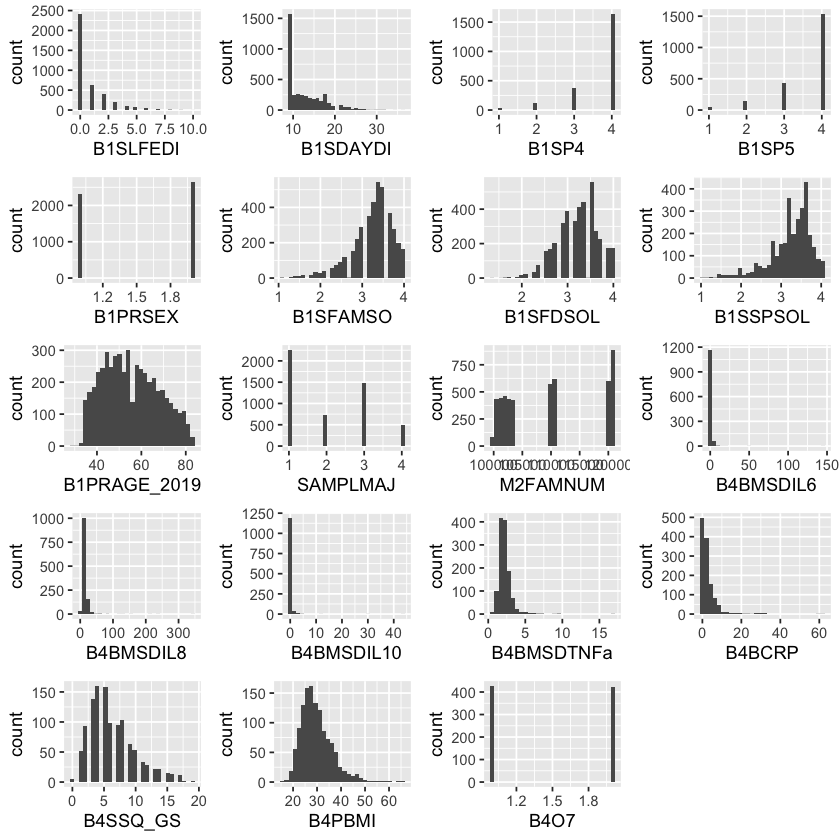

In [3]:
# distribution and histograms
options(warn = -1)
describe(select(m2_all, B1SLFEDI, B1SDAYDI, B1SP4, B1SP5, B1PRSEX, B1SFAMSO, B1SFDSOL, B1SSPSOL, B1PRAGE_2019, SAMPLMAJ, M2FAMNUM,
                B4BMSDIL6, B4BMSDIL8, B4BMSDIL10, B4BMSDTNFa, B4BCRP, B4SSQ_GS, B4PBMI, B4O7))
histthem(m2_all, cs(B1SLFEDI, B1SDAYDI, B1SP4, B1SP5, B1PRSEX, B1SFAMSO, B1SFDSOL, B1SSPSOL, B1PRAGE_2019, SAMPLMAJ, M2FAMNUM,
                B4BMSDIL6, B4BMSDIL8, B4BMSDIL10, B4BMSDTNFa, B4BCRP, B4SSQ_GS, B4PBMI, B4O7))

In [4]:
# rename and handle skewed variables (log transform right-skewed and square left-skewed) with a skewness > 1
# categorize subjects into impacted vs not impacted by discrimination (1 = impacted, 0 = not impacted)
# create composite scores of cytokines
m2_all <- m2_all %>%
    mutate(life_dis_t1 = log(B1SLFEDI + 1),
           day_dis_t1 = log(B1SDAYDI),
           dis_impact1_t1 = B1SP4,
           dis_impact2_t1 = B1SP5,
           dis_impact_t1 = case_when(dis_impact1_t1 + dis_impact2_t1 == 8 ~ 0, dis_impact1_t1 != 4 | dis_impact2_t1 != 4 ~ 1),
           sex_t1 = B1PRSEX - 1,
           fam_solidarity_t1 = B1SFAMSO ^ 2,
           fri_solidarity_t1 = B1SFDSOL,
           part_solidarity_t1 = B1SSPSOL ^ 2,
           age_t1 = B1PRAGE_2019,
           sample_t1 = SAMPLMAJ,
           fam_t1 = M2FAMNUM,
           il6_t1 = scale(log(B4BMSDIL6)),
           il8_t1 = scale(log(B4BMSDIL8)),
           il10_t1 = scale(log(B4BMSDIL10)),
           tnfa_t1 = scale(log(B4BMSDTNFa)),
           crp_t1 = scale(log(B4BCRP)),
           sleep_t1 = B4SSQ_GS,
           bmi_t1 = log(B4PBMI),
           smoke_t1 = B4O7 - 1)
m2_all <- m2_all %>%
    mutate(inflam_t1 = rowMeans(select(m2_all, il6_t1, il8_t1, il10_t1, tnfa_t1), na.rm = TRUE))
m2 <- select(m2_all, life_dis_t1, day_dis_t1, dis_impact_t1, sex_t1, fam_solidarity_t1, fri_solidarity_t1, part_solidarity_t1, age_t1,
             sample_t1, fam_t1, inflam_t1, crp_t1, sleep_t1, bmi_t1, smoke_t1, M2ID)

In [5]:
# m3
# select from each dataset columns to be merged
m3_survey_tomerge <- select(m3_survey, M2ID, C1SLFEDI, C1SDAYDI, C1SP5, C1SP6, C1PRSEX, C1SFAMSO, C1SFDSOL, C1SSPSOL, C1PRAGE, SAMPLMAJ, M2FAMNUM)
m3_bio_tomerge <- select(m3_bio, M2ID, C4BMSDIL6, C4BMSDIL8, C4BMSDIL10, C4BMSDTNFa, C4BCRP, C4SSQ_GS, C4PBMI, C4H60)
m3_all <- merge(m3_survey_tomerge, m3_bio_tomerge, by = "M2ID", all = TRUE)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C1SLFEDI,1,2786,8.661163e-01,1.4776688,0.000000e+00,5.295964e-01,0.000000e+00,0.00000,11.00000,11.00000,2.1693298,5.2650600,2.799539e-02
C1SDAYDI,2,2852,1.241593e+01,4.3683792,1.000000e+01,1.166180e+01,1.482600e+00,9.00000,36.00000,27.00000,1.5022538,2.6125872,8.179854e-02
C1SP5,3,936,3.519231e+00,0.7653274,4.000000e+00,3.676000e+00,0.000000e+00,1.00000,4.00000,3.00000,-1.4874349,1.3419917,2.501551e-02
C1SP6,4,936,3.465812e+00,0.7759114,4.000000e+00,3.608000e+00,0.000000e+00,1.00000,4.00000,3.00000,-1.2927422,0.7796362,2.536146e-02
C1PRSEX,5,3294,1.549484e+00,0.4976209,2.000000e+00,1.561836e+00,0.000000e+00,1.00000,2.00000,1.00000,-0.1988216,-1.9610650,8.670353e-03
C1SFAMSO,6,2875,3.271833e+00,0.5054622,3.375000e+00,3.322339e+00,3.706500e-01,1.00000,4.00000,3.00000,-1.0409125,1.4222129,9.426919e-03
C1SFDSOL,7,2868,3.287644e+00,0.4498781,3.375000e+00,3.308278e+00,5.559750e-01,1.00000,4.00000,3.00000,-0.5259088,0.4887203,8.400503e-03
C1SSPSOL,8,2032,3.268479e+00,0.5384587,3.416667e+00,3.336214e+00,4.885841e-01,1.00000,4.00000,3.00000,-1.2801332,1.8586645,1.194512e-02
C1PRAGE,9,3294,6.364117e+01,11.3497775,6.300000e+01,6.328869e+01,1.334340e+01,39.00000,93.00000,54.00000,0.2399449,-0.7063683,1.977541e-01


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwid

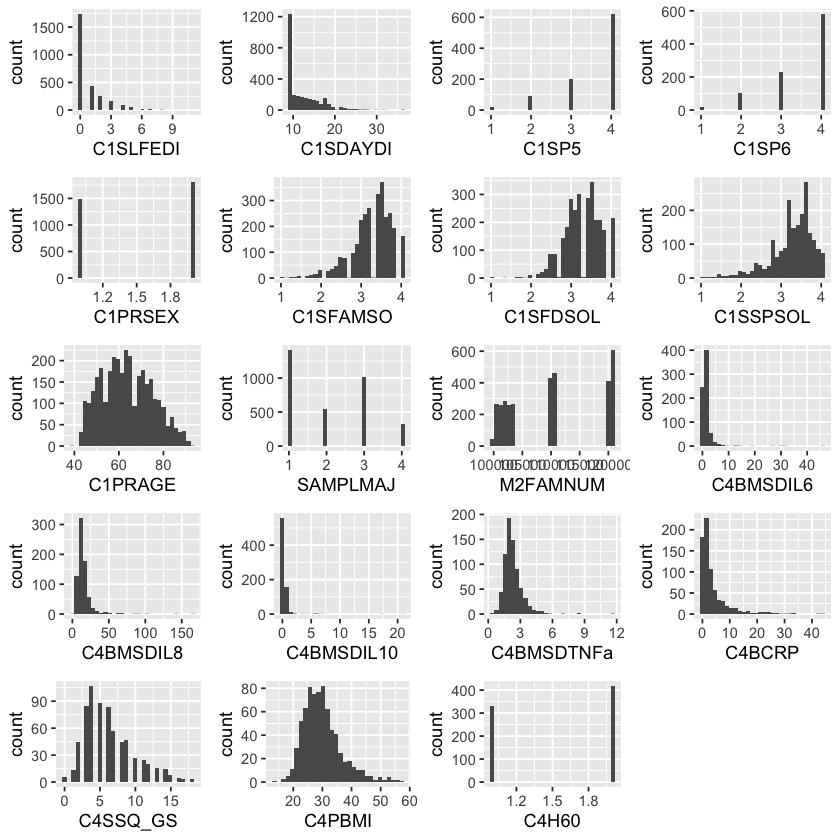

In [6]:
# distribution and histograms
options(warn = -1)
describe(select(m3_all, C1SLFEDI, C1SDAYDI, C1SP5, C1SP6, C1PRSEX, C1SFAMSO, C1SFDSOL, C1SSPSOL, C1PRAGE, SAMPLMAJ, M2FAMNUM,
                C4BMSDIL6, C4BMSDIL8, C4BMSDIL10, C4BMSDTNFa, C4BCRP, C4SSQ_GS, C4PBMI, C4H60))
histthem(m3_all, cs(C1SLFEDI, C1SDAYDI, C1SP5, C1SP6, C1PRSEX, C1SFAMSO, C1SFDSOL, C1SSPSOL, C1PRAGE, SAMPLMAJ, M2FAMNUM,
                C4BMSDIL6, C4BMSDIL8, C4BMSDIL10, C4BMSDTNFa, C4BCRP, C4SSQ_GS, C4PBMI, C4H60))

In [7]:
# rename and handle skewed variables (log transform right-skewed and square left-skewed) with a skewness > 1
# categorize subjects into impacted vs not impacted by discrimination (1 = impacted, 0 = not impacted)
# create composite scores of cytokines
m3_all <- m3_all %>%
    mutate(life_dis_t2 = log(C1SLFEDI + 1),
           day_dis_t2 = log(C1SDAYDI),
           dis_impact1_t2 = C1SP5,
           dis_impact2_t2 = C1SP6,
           dis_impact_t2 = case_when(dis_impact1_t2 + dis_impact2_t2 == 8 ~ 0, dis_impact1_t2 != 4 | dis_impact2_t2 != 4 ~ 1),
           sex_t2 = C1PRSEX - 1,
           fam_solidarity_t2 = C1SFAMSO ^ 2,
           fri_solidarity_t2 = C1SFDSOL,
           part_solidarity_t2 = C1SSPSOL ^ 2,
           age_t2 = C1PRAGE,
           sample_t2 = SAMPLMAJ,
           fam_t2 = M2FAMNUM,
           il6_t2 = scale(log(C4BMSDIL6)),
           il8_t2 = scale(log(C4BMSDIL8)),
           il10_t2 = scale(log(C4BMSDIL10)),
           tnfa_t2 = scale(log(C4BMSDTNFa)),
           crp_t2 = scale(log(C4BCRP)),
           sleep_t2 = C4SSQ_GS,
           bmi_t2 = log(C4PBMI),
           smoke_t2 = C4H60 - 1)
m3_all <- m3_all %>%
    mutate(inflam_t2 = rowMeans(select(m3_all, il6_t2, il8_t2, il10_t2, tnfa_t2), na.rm = TRUE))
m3 <- select(m3_all, life_dis_t2, day_dis_t2, dis_impact_t2, sex_t2, fam_solidarity_t2, fri_solidarity_t2, part_solidarity_t2, age_t2,
             sample_t2, fam_t2, inflam_t2, crp_t2, sleep_t2, bmi_t2, smoke_t2, M2ID)

In [8]:
# merge two datasets
dat <- merge(m2, m3, by = "M2ID", all = TRUE)
dim(dat)
head(dat)

[1] 5165   31

,M2ID,life_dis_t1,day_dis_t1,dis_impact_t1,sex_t1,fam_solidarity_t1,fri_solidarity_t1,part_solidarity_t1,age_t1,sample_t1,...,fri_solidarity_t2,part_solidarity_t2,age_t2,sample_t2,fam_t2,inflam_t2,crp_t2,sleep_t2,bmi_t2,smoke_t2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl+lbl>,<dbl>,<dbl+lbl>,<dbl+lbl>,...,<dbl+lbl>,<dbl>,<dbl>,<dbl+lbl>,<dbl>,<dbl>,"<dbl[,1]>",<dbl+lbl>,<dbl>,<dbl>
1,10001,0.0000000,2.197225,NA,0,9.00000,2.750,NA,61,2,...,2.625,NA,69,2,110498,NaN,NA,NA,NA,NA
2,10002,0.0000000,2.197225,NA,0,14.06250,2.875,10.027778,69,1,...,NA,NA,78,1,100001,NaN,NA,NA,NA,NA
3,10005,NA,2.197225,NA,1,15.01562,3.750,NA,80,3,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,10006,NA,NA,NA,1,NA,NA,NA,60,3,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,10010,0.6931472,2.772589,1,0,15.01562,3.625,12.250000,55,3,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,10011,1.3862944,2.564949,0,1,12.25000,3.250,3.361111,52,2,...,3.250,NA,61,2,110475,NaN,NA,NA,NA,NA


## Statistical analyses

### Variables used in the analyses

***T1***

Predictors:

1. Life time discrimination (summary): life_dis_t1 [higher scores indicating more lifetime discrimination]

2. Daily discrimination (summary): day_dis_t1 [higher scores indicating more daily discrimination]

3. Impact of discrimination: dis_impact_t1 [0 = no impact, 1 = impact]

Outcomes:

1. Cytokin composite (IL-6, IL-8, IL-10, and TNF-α): inflam_t1 [higher scores indicating more inflammation]

2. CRP: crp_t1 [higher scores indicating more inflammation]

Hypothesized mediator:

1. Sleep quality: sleep_t1 [lower scores indicating better sleep]

Hypothesized moderators:

1. Sex at birth: sex_t1 [0 = male, 1 = female]

2. Social connections: fam_solidarity_t1 (family affectual solidarity, highers scores indicating more solidarity), fri_solidarity_t1 (friend affectual solidarity, highers scores indicating more solidarity), part_solidarity_t1 (partner affectual solidarity, highers scores indicating more solidarity)

Covariates for sensitivity analyses:

1. age: age_t1

2. BMI: bmi_t1 [higher scores indicating higher BMI]

3. Smoking status: smoke_t1 (0 = yes, 1 = no)

Random effect/cluster:

1. Sample identification: sample_t1 [1 = main RDD, 2 = sibling, 3 = twin, 4 = city oversamples]

2. Family number: fam_t1

***T2***

Predictors:

1. Life time discrimination (summary): life_dis_t2 [higher scores indicating more lifetime discrimination]

2. Daily discrimination (summary): day_dis_t2 [higher scores indicating more daily discrimination]

3. Impact of discrimination: dis_impact_t2 [0 = no impact, 1 = impact]

Outcomes:

1. Cytokin composite (IL-6, IL-8, IL-10, and TNF-α): inflam_t2 [higher scores indicating more inflammation]

2. CRP: crp_t2 [higher scores indicating more inflammation]

Hypothesized mediator:

1. Sleep quality: sleep_t2 [lower scores indicating better sleep]

Hypothesized moderators:

1. Sex at birth: sex_t2 [0 = male, 1 = female]

2. Social connections: fam_solidarity_t2 (family affectual solidarity, highers scores indicating more solidarity), fri_solidarity_t2 (friend affectual solidarity, highers scores indicating more solidarity), part_solidarity_t2 (partner affectual solidarity, highers scores indicating more solidarity)

Covariates for sensitivity analyses:

1. age: age_t2

2. BMI: bmi_t2 [higher scores indicating higher BMI]

3. Smoking status: smoke_t2 (0 = yes, 1 = no)

Random effect/cluster:

1. Sample identification: sample_t2 [1 = main RDD, 2 = sibling, 3 = twin, 4 = city oversamples]

2. Family number: fam_t2

### Distribution Analysis

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
life_dis_t1,1,3880,4.093990e-01,0.5832803,0.000000e+00,3.056290e-01,0.000000e+00,0.000000,2.397895e+00,2.397895,1.121637672,0.04805325,9.364000e-03
day_dis_t1,2,3978,2.496776e+00,0.3144621,2.397895e+00,2.460305e+00,2.975144e-01,2.197225,3.583519e+00,1.386294,0.663162506,-0.72951632,4.985812e-03
dis_impact_t1,3,2166,3.236380e-01,0.4679718,0.000000e+00,2.797001e-01,0.000000e+00,0.000000,1.000000e+00,1.000000,0.753381081,-1.43307793,1.005519e-02
sex_t1,4,4963,5.333468e-01,0.4989370,1.000000e+00,5.416772e-01,0.000000e+00,0.000000,1.000000e+00,1.000000,-0.133644310,-1.98253854,7.082288e-03
fam_solidarity_t1,5,4017,1.073780e+01,2.9404359,1.139062e+01,1.089307e+01,2.594550e+00,1.265625,1.600000e+01,14.734375,-0.513561298,0.08926867,4.639389e-02
fri_solidarity_t1,6,4000,3.224389e+00,0.4379213,3.250000e+00,3.240708e+00,3.706500e-01,1.375000,4.000000e+00,2.625000,-0.416520188,-0.03995180,6.924144e-03
part_solidarity_t1,7,3056,1.079426e+01,3.0516122,1.111111e+01,1.103189e+01,2.563662e+00,1.000000,1.600000e+01,15.000000,-0.704487728,0.18490940,5.520173e-02
age_t1,8,4963,5.541447e+01,12.4526709,5.500000e+01,5.497557e+01,1.482600e+01,28.000000,8.400000e+01,56.000000,0.261856452,-0.83364209,1.767626e-01
sample_t1,9,4963,2.041306e+00,1.0707097,2.000000e+00,1.928481e+00,1.482600e+00,1.000000,4.000000e+00,3.000000,0.399498813,-1.29755391,1.519846e-02


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwid

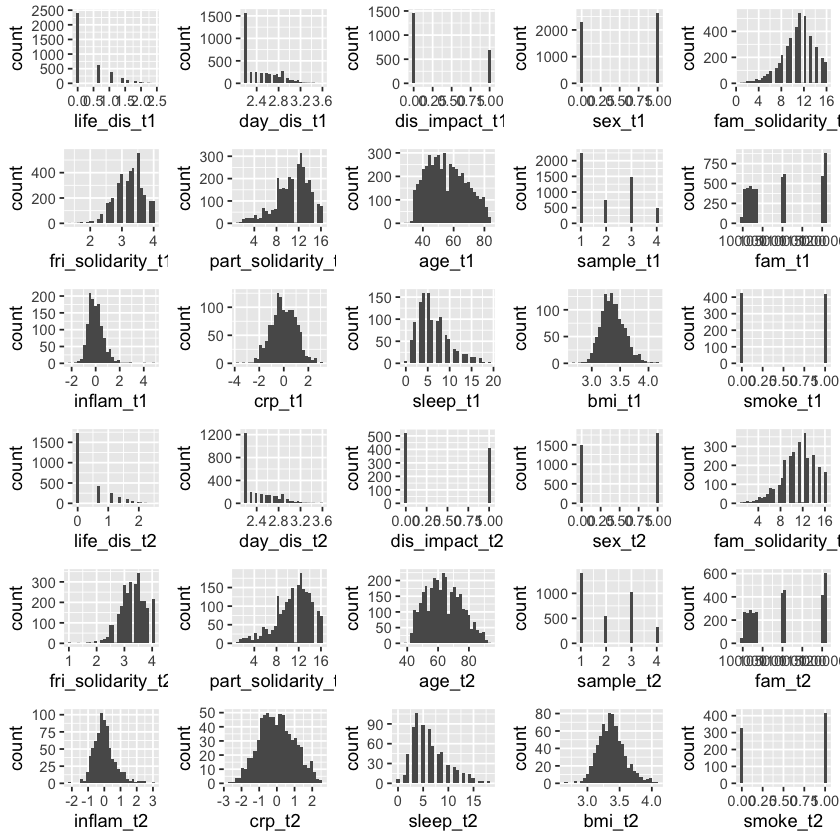

In [9]:
# distribution and histogram check again
describe(select(dat, life_dis_t1, day_dis_t1, dis_impact_t1, sex_t1, fam_solidarity_t1, fri_solidarity_t1, part_solidarity_t1, age_t1,
             sample_t1, fam_t1, inflam_t1, crp_t1, sleep_t1, bmi_t1, smoke_t1, life_dis_t2, day_dis_t2, dis_impact_t2, sex_t2, fam_solidarity_t2, 
             fri_solidarity_t2, part_solidarity_t2, age_t2, sample_t2, fam_t2, inflam_t2, crp_t2, sleep_t2, bmi_t2, smoke_t2))
histthem(dat, cs(life_dis_t1, day_dis_t1, dis_impact_t1, sex_t1, fam_solidarity_t1, fri_solidarity_t1, part_solidarity_t1, age_t1,
             sample_t1, fam_t1, inflam_t1, crp_t1, sleep_t1, bmi_t1, smoke_t1, life_dis_t2, day_dis_t2, dis_impact_t2, sex_t2, fam_solidarity_t2, 
             fri_solidarity_t2, part_solidarity_t2, age_t2, sample_t2, fam_t2, inflam_t2, crp_t2, sleep_t2, bmi_t2, smoke_t2))
# most variables have the magnitude of skewness less than 1
# with a relatively normal distribution for continuous variables and relatively even distribution for categorical variables

### Correlation Matrices

In [10]:
# correlation matrix for main variables of interest
corr.test(select(dat,life_dis_t1, day_dis_t1, dis_impact_t1, inflam_t1, crp_t1, life_dis_t2, day_dis_t2, dis_impact_t2, inflam_t2, crp_t2))

Call:corr.test(x = select(dat, life_dis_t1, day_dis_t1, dis_impact_t1, 
    inflam_t1, crp_t1, life_dis_t2, day_dis_t2, dis_impact_t2, 
    inflam_t2, crp_t2))
Correlation matrix 
              life_dis_t1 day_dis_t1 dis_impact_t1 inflam_t1 crp_t1 life_dis_t2
life_dis_t1          1.00       0.44          0.36      0.04   0.07        0.53
day_dis_t1           0.44       1.00          0.40      0.04   0.06        0.34
dis_impact_t1        0.36       0.40          1.00      0.03   0.08        0.30
inflam_t1            0.04       0.04          0.03      1.00   0.33        0.04
crp_t1               0.07       0.06          0.08      0.33   1.00        0.08
life_dis_t2          0.53       0.34          0.30      0.04   0.08        1.00
day_dis_t2           0.34       0.55          0.31      0.03   0.09        0.44
dis_impact_t2        0.23       0.30          0.41      0.11   0.06        0.35
inflam_t2            0.08       0.04          0.02      0.48   0.17        0.09
crp_t2              

In [11]:
# visualization of correlation matrix
dat_cor <- select(dat,life_dis_t1, day_dis_t1, dis_impact_t1, inflam_t1, crp_t1, life_dis_t2, day_dis_t2, dis_impact_t2, inflam_t2, crp_t2)
cor(dat_cor, use="pairwise.complete.obs")
cor_mat <- as.matrix(cor(dat_cor, use="pairwise.complete.obs"))

,life_dis_t1,day_dis_t1,dis_impact_t1,inflam_t1,crp_t1,life_dis_t2,day_dis_t2,dis_impact_t2,inflam_t2,crp_t2
life_dis_t1,1.00000000,0.43519603,0.36045682,0.03894485,0.07312745,0.53223955,0.33652168,0.23030141,0.07590311,0.07786523
day_dis_t1,0.43519603,1.00000000,0.39790230,0.03926875,0.06202095,0.33607652,0.55493910,0.30273579,0.04401189,0.03908239
dis_impact_t1,0.36045682,0.39790230,1.00000000,0.02716601,0.07819559,0.30244412,0.30821946,0.40633683,0.02475407,0.04076500
inflam_t1,0.03894485,0.03926875,0.02716601,1.00000000,0.33161231,0.04108452,0.02806755,0.11119729,0.47996929,0.14698536
crp_t1,0.07312745,0.06202095,0.07819559,0.33161231,1.00000000,0.07907112,0.08544036,0.05641823,0.17353556,0.58058741
life_dis_t2,0.53223955,0.33607652,0.30244412,0.04108452,0.07907112,1.00000000,0.44127942,0.34940924,0.09123938,0.10826842
day_dis_t2,0.33652168,0.55493910,0.30821946,0.02806755,0.08544036,0.44127942,1.00000000,0.37405903,0.06413345,0.12049009
dis_impact_t2,0.23030141,0.30273579,0.40633683,0.11119729,0.05641823,0.34940924,0.37405903,1.00000000,0.10906787,0.09784486
inflam_t2,0.07590311,0.04401189,0.02475407,0.47996929,0.17353556,0.09123938,0.06413345,0.10906787,1.00000000,0.33549138
crp_t2,0.07786523,0.03908239,0.04076500,0.14698536,0.58058741,0.10826842,0.12049009,0.09784486,0.33549138,1.00000000



Attaching package: 'reshape2'


The following object is masked from 'package:tidyr':

    smiths




,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,life_dis_t1,life_dis_t1,1.00000000
2,day_dis_t1,life_dis_t1,0.43519603
3,dis_impact_t1,life_dis_t1,0.36045682
4,inflam_t1,life_dis_t1,0.03894485
5,crp_t1,life_dis_t1,0.07312745
6,life_dis_t2,life_dis_t1,0.53223955


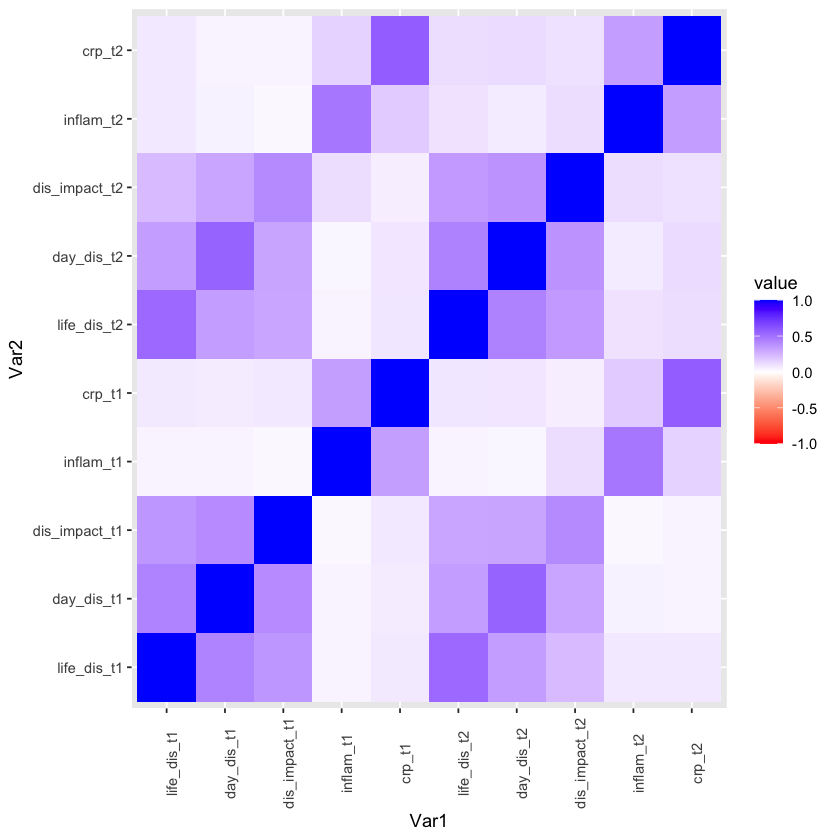

In [12]:
library(reshape2)
cor_melted <- melt(cor_mat)
head(cor_melted)
ggplot(data = cor_melted, aes(x = Var1, y = Var2, fill = value)) +
    geom_tile() +
    theme(axis.text.x = element_text(angle = 90)) +
    scale_fill_gradient2(low = "red", high = "blue", limits = c(-1, 1))

From the heatmap, we can see that none of the variables are negatively correlated. From the diagonal purple line at the bottom-right corner, we can see that all of the variables have moderate between time-point stability. Measures of discrimination (daily, life, and impact) are correlated with each other and measures of inflammation (composite and CRP) are correlated with each other. Since their correlations are smaller than .5 suggesting correlated but not completely overlapping constructs, I chose to not make composite scores for discrimination and inflammation. There are less obvious correlations between discrimination and inflammation, which should be investigated further with regression models.

### Linear regression modeling
#### Cross-sectional models

In [13]:
# T1
# composite score of inflammation
summary(lm.beta(lm(inflam_t1 ~ life_dis_t1, data = dat)))
summary(lm.beta(lm(inflam_t1 ~ day_dis_t1, data = dat)))
summary(lm.beta(lm(inflam_t1 ~ dis_impact_t1, data = dat)))
# CRP
summary(lm.beta(lm(crp_t1 ~ life_dis_t1, data = dat)))
summary(lm.beta(lm(crp_t1 ~ day_dis_t1, data = dat)))
summary(lm.beta(lm(crp_t1 ~ dis_impact_t1, data = dat)))


Call:
lm(formula = inflam_t1 ~ life_dis_t1, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2210 -0.4553 -0.0713  0.3349  4.7725 

Coefficients:
            Estimate Standardized Std. Error t value Pr(>|t|)  
(Intercept) -0.04185           NA    0.02531  -1.653   0.0986 .
life_dis_t1  0.04126      0.03894    0.03313   1.245   0.2133  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.644 on 1021 degrees of freedom
  (4142 observations deleted due to missingness)
Multiple R-squared:  0.001517,	Adjusted R-squared:  0.0005388 
F-statistic: 1.551 on 1 and 1021 DF,  p-value: 0.2133



Call:
lm(formula = inflam_t1 ~ day_dis_t1, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2267 -0.4555 -0.0751  0.3356  4.7500 

Coefficients:
            Estimate Standardized Std. Error t value Pr(>|t|)
(Intercept) -0.22275           NA    0.16290  -1.367    0.172
day_dis_t1   0.08186      0.03927    0.06481   1.263    0.207

Residual standard error: 0.6432 on 1033 degrees of freedom
  (4130 observations deleted due to missingness)
Multiple R-squared:  0.001542,	Adjusted R-squared:  0.0005755 
F-statistic: 1.595 on 1 and 1033 DF,  p-value: 0.2068



Call:
lm(formula = inflam_t1 ~ dis_impact_t1, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2394 -0.4642 -0.0744  0.3151  4.7272 

Coefficients:
              Estimate Standardized Std. Error t value Pr(>|t|)
(Intercept)   0.003511           NA   0.032846   0.107    0.915
dis_impact_t1 0.039467     0.027166   0.059190   0.667    0.505

Residual standard error: 0.6715 on 602 degrees of freedom
  (4561 observations deleted due to missingness)
Multiple R-squared:  0.000738,	Adjusted R-squared:  -0.0009219 
F-statistic: 0.4446 on 1 and 602 DF,  p-value: 0.5052



Call:
lm(formula = crp_t1 ~ life_dis_t1, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2828 -0.6421 -0.0361  0.7219  3.2458 

Coefficients:
            Estimate Standardized Std. Error t value Pr(>|t|)   
(Intercept) -0.12266           NA    0.03838  -3.196  0.00143 **
life_dis_t1  0.11766      0.07313    0.05027   2.341  0.01944 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9747 on 1019 degrees of freedom
  (4144 observations deleted due to missingness)
Multiple R-squared:  0.005348,	Adjusted R-squared:  0.004372 
F-statistic: 5.479 on 1 and 1019 DF,  p-value: 0.01944



Call:
lm(formula = crp_t1 ~ day_dis_t1, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2402 -0.6490 -0.0359  0.7148  3.1169 

Coefficients:
            Estimate Standardized Std. Error t value Pr(>|t|)  
(Intercept) -0.56040           NA    0.24684  -2.270   0.0234 *
day_dis_t1   0.19602      0.06202    0.09824   1.995   0.0463 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9727 on 1031 degrees of freedom
  (4132 observations deleted due to missingness)
Multiple R-squared:  0.003847,	Adjusted R-squared:  0.00288 
F-statistic: 3.981 on 1 and 1031 DF,  p-value: 0.04627



Call:
lm(formula = crp_t1 ~ dis_impact_t1, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2931 -0.6932 -0.0431  0.7199  3.1947 

Coefficients:
              Estimate Standardized Std. Error t value Pr(>|t|)  
(Intercept)   -0.07159           NA    0.04889  -1.464   0.1436  
dis_impact_t1  0.17001      0.07820    0.08834   1.924   0.0548 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.001 on 602 degrees of freedom
  (4561 observations deleted due to missingness)
Multiple R-squared:  0.006115,	Adjusted R-squared:  0.004464 
F-statistic: 3.704 on 1 and 602 DF,  p-value: 0.05477


It seems that none of the discrimination measures is significantly associated with the composite score of inflammation, but both life discrimination and daily discrimination are significantly and positively associated with CRP, and the impact of discimination is marginally significantly and positively associated with CRP. As such, I will only conduct sensitivity analyses for CRP instead of composite score of inflammation below.

In [14]:
# examine if the impact of discrimination moderates the effect of discrimination on inflammation
# composite score of inflammation
summary(lm.beta(lm(inflam_t1 ~ dis_impact_t1 * life_dis_t1, data = dat)))
summary(lm.beta(lm(inflam_t1 ~ dis_impact_t1 * day_dis_t1, data = dat)))
# CRP
summary(lm.beta(lm(crp_t1 ~ dis_impact_t1 * life_dis_t1, data = dat)))
summary(lm.beta(lm(crp_t1 ~ dis_impact_t1 * day_dis_t1, data = dat)))


Call:
lm(formula = inflam_t1 ~ dis_impact_t1 * life_dis_t1, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2080 -0.4631 -0.0769  0.3377  4.7462 

Coefficients:
                          Estimate Standardized Std. Error t value Pr(>|t|)
(Intercept)               -0.01552           NA    0.04503  -0.345    0.730
dis_impact_t1              0.10889      0.07490    0.11124   0.979    0.328
life_dis_t1                0.04160      0.03991    0.05902   0.705    0.481
dis_impact_t1:life_dis_t1 -0.09246     -0.08587    0.09877  -0.936    0.350

Residual standard error: 0.6723 on 595 degrees of freedom
  (4566 observations deleted due to missingness)
Multiple R-squared:  0.001958,	Adjusted R-squared:  -0.003074 
F-statistic: 0.3891 on 3 and 595 DF,  p-value: 0.7609



Call:
lm(formula = inflam_t1 ~ dis_impact_t1 * day_dis_t1, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1711 -0.4650 -0.0771  0.3353  4.7340 

Coefficients:
                         Estimate Standardized Std. Error t value Pr(>|t|)  
(Intercept)              -0.30060           NA    0.32682  -0.920   0.3581  
dis_impact_t1             1.02949      0.70853    0.57755   1.783   0.0752 .
day_dis_t1                0.11964      0.05258    0.12758   0.938   0.3487  
dis_impact_t1:day_dis_t1 -0.36364     -0.70903    0.21133  -1.721   0.0858 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6714 on 599 degrees of freedom
  (4562 observations deleted due to missingness)
Multiple R-squared:  0.005649,	Adjusted R-squared:  0.0006686 
F-statistic: 1.134 on 3 and 599 DF,  p-value: 0.3345



Call:
lm(formula = crp_t1 ~ dis_impact_t1 * life_dis_t1, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2634 -0.6834 -0.0329  0.7435  3.2440 

Coefficients:
                          Estimate Standardized Std. Error t value Pr(>|t|)  
(Intercept)               -0.12093           NA    0.06731  -1.797   0.0729 .
dis_impact_t1              0.27829      0.12768    0.16495   1.687   0.0921 .
life_dis_t1                0.10408      0.06658    0.08801   1.183   0.2375  
dis_impact_t1:life_dis_t1 -0.15352     -0.09485    0.14692  -1.045   0.2965  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.003 on 595 degrees of freedom
  (4566 observations deleted due to missingness)
Multiple R-squared:  0.008626,	Adjusted R-squared:  0.003627 
F-statistic: 1.726 on 3 and 595 DF,  p-value: 0.1605



Call:
lm(formula = crp_t1 ~ dis_impact_t1 * day_dis_t1, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2929 -0.6949 -0.0253  0.7219  3.1499 

Coefficients:
                         Estimate Standardized Std. Error t value Pr(>|t|)
(Intercept)              -0.39380           NA    0.48688  -0.809    0.419
dis_impact_t1             0.49436      0.22736    0.86460   0.572    0.568
day_dis_t1                0.12696      0.03731    0.19013   0.668    0.505
dis_impact_t1:day_dis_t1 -0.12772     -0.16635    0.31639  -0.404    0.687

Residual standard error: 1.003 on 599 degrees of freedom
  (4562 observations deleted due to missingness)
Multiple R-squared:  0.006764,	Adjusted R-squared:  0.001789 
F-statistic:  1.36 on 3 and 599 DF,  p-value: 0.2541


JOHNSON-NEYMAN INTERVAL

The Johnson-Neyman interval could not be found. Is the p value for your
interaction term below the specified alpha?

SIMPLE SLOPES ANALYSIS

Slope of day_dis_t1 when dis_impact_t1 = 0.00 (0): 

  Est.   S.E.   t val.      p
------ ------ -------- ------
  0.12   0.13     0.94   0.35

Slope of day_dis_t1 when dis_impact_t1 = 1.00 (1): 

   Est.   S.E.   t val.      p
------- ------ -------- ------
  -0.24   0.17    -1.45   0.15


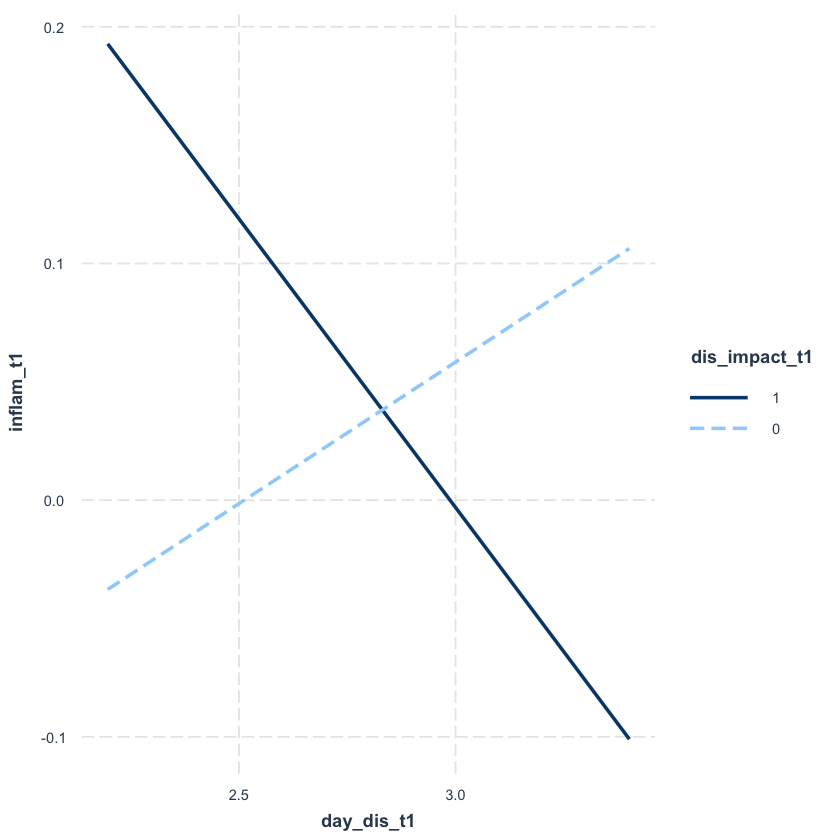

In [15]:
# probe interaction
library(interactions)
mod <- (lm(inflam_t1 ~ dis_impact_t1 * day_dis_t1, data = dat))
probe_interaction(mod, pred = "day_dis_t1", modx = "dis_impact_t1")

The impact of discrimination only marginally moderates the relation between daily discrimination and inflammation. Also, none of the slopes when probing interactions were significant. As a result, I will not conduct further sensitivity analyses on this interaction or any other three nonsignificant interactions.

In [16]:
# T2
# composite score of inflammation
summary(lm.beta(lm(inflam_t2 ~ life_dis_t2, data = dat)))
summary(lm.beta(lm(inflam_t2 ~ day_dis_t2, data = dat)))
summary(lm.beta(lm(inflam_t2 ~ dis_impact_t2, data = dat)))
# CRP
summary(lm.beta(lm(crp_t2 ~ life_dis_t2, data = dat)))
summary(lm.beta(lm(crp_t2 ~ day_dis_t2, data = dat)))
summary(lm.beta(lm(crp_t2 ~ dis_impact_t2, data = dat)))


Call:
lm(formula = inflam_t2 ~ life_dis_t2, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.09418 -0.42909 -0.06436  0.31703  3.04092 

Coefficients:
            Estimate Standardized Std. Error t value Pr(>|t|)  
(Intercept) -0.07541           NA    0.03370  -2.237   0.0256 *
life_dis_t2  0.09862      0.09124    0.04387   2.248   0.0249 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6628 on 602 degrees of freedom
  (4561 observations deleted due to missingness)
Multiple R-squared:  0.008325,	Adjusted R-squared:  0.006677 
F-statistic: 5.053 on 1 and 602 DF,  p-value: 0.02494



Call:
lm(formula = inflam_t2 ~ day_dis_t2, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.09966 -0.42103 -0.06612  0.28481  3.03544 

Coefficients:
            Estimate Standardized Std. Error t value Pr(>|t|)  
(Intercept) -0.38025           NA    0.22032  -1.726   0.0849 .
day_dis_t2   0.14124      0.06413    0.08869   1.592   0.1118  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6616 on 614 degrees of freedom
  (4549 observations deleted due to missingness)
Multiple R-squared:  0.004113,	Adjusted R-squared:  0.002491 
F-statistic: 2.536 on 1 and 614 DF,  p-value: 0.1118



Call:
lm(formula = inflam_t2 ~ dis_impact_t2, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4605 -0.4002 -0.0317  0.2802  2.1696 

Coefficients:
              Estimate Standardized Std. Error t value Pr(>|t|)  
(Intercept)   -0.04956           NA    0.05343  -0.928   0.3546  
dis_impact_t2  0.13508      0.10907    0.08048   1.678   0.0946 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6138 on 234 degrees of freedom
  (4929 observations deleted due to missingness)
Multiple R-squared:  0.0119,	Adjusted R-squared:  0.007673 
F-statistic: 2.817 on 1 and 234 DF,  p-value: 0.0946



Call:
lm(formula = crp_t2 ~ life_dis_t2, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.59196 -0.69058 -0.02887  0.61769  2.44023 

Coefficients:
            Estimate Standardized Std. Error t value Pr(>|t|)   
(Intercept) -0.15396           NA    0.04924  -3.127  0.00185 **
life_dis_t2  0.17126      0.10827    0.06409   2.672  0.00774 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9683 on 602 degrees of freedom
  (4561 observations deleted due to missingness)
Multiple R-squared:  0.01172,	Adjusted R-squared:  0.01008 
F-statistic:  7.14 on 1 and 602 DF,  p-value: 0.007741



Call:
lm(formula = crp_t2 ~ day_dis_t2, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.45208 -0.71613 -0.02031  0.62008  2.45903 

Coefficients:
            Estimate Standardized Std. Error t value Pr(>|t|)   
(Intercept)  -1.0370           NA     0.3240  -3.201  0.00144 **
day_dis_t2    0.3923       0.1205     0.1304   3.008  0.00274 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9729 on 614 degrees of freedom
  (4549 observations deleted due to missingness)
Multiple R-squared:  0.01452,	Adjusted R-squared:  0.01291 
F-statistic: 9.045 on 1 and 614 DF,  p-value: 0.002741



Call:
lm(formula = crp_t2 ~ dis_impact_t2, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.52866 -0.68079 -0.00254  0.64850  2.28515 

Coefficients:
              Estimate Standardized Std. Error t value Pr(>|t|)
(Intercept)   -0.01011           NA    0.08626  -0.117    0.907
dis_impact_t2  0.19543      0.09784    0.12994   1.504    0.134

Residual standard error: 0.9911 on 234 degrees of freedom
  (4929 observations deleted due to missingness)
Multiple R-squared:  0.009574,	Adjusted R-squared:  0.005341 
F-statistic: 2.262 on 1 and 234 DF,  p-value: 0.1339


At Time 2, lifetime discrimination, but not daily discrimination, is significantly positively associated with inflammation composite score, and the impact of discrimination is marginally significantly associated with inflammation composite score. For CRP, both lifetime and daily discrimination are positively and significantly associated with it, but not the impact of discrimination.

As such, I will conduct sensitivity analyses on the relation between lifetime discrimination/discrimination impact and inflammation composite, and between lifetime/daily discrimination and CRP.

In [17]:
# examine if the impact of discrimination moderates the effect of discrimination on inflammation
# composite score of inflammation
summary(lm.beta(lm(inflam_t2 ~ dis_impact_t2 * life_dis_t2, data = dat)))
summary(lm.beta(lm(inflam_t2 ~ dis_impact_t2 * day_dis_t2, data = dat)))
# CRP
summary(lm.beta(lm(crp_t2 ~ dis_impact_t2 * life_dis_t2, data = dat)))
summary(lm.beta(lm(crp_t2 ~ dis_impact_t2 * day_dis_t2, data = dat)))


Call:
lm(formula = inflam_t2 ~ dis_impact_t2 * life_dis_t2, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.45077 -0.39075 -0.03033  0.29375  2.16910 

Coefficients:
                          Estimate Standardized Std. Error t value Pr(>|t|)
(Intercept)               -0.10814           NA    0.08808  -1.228    0.221
dis_impact_t2              0.21628      0.17353    0.15400   1.404    0.162
life_dis_t2                0.07996      0.08023    0.09876   0.810    0.419
dis_impact_t2:life_dis_t2 -0.10005     -0.11277    0.13900  -0.720    0.472

Residual standard error: 0.619 on 229 degrees of freedom
  (4932 observations deleted due to missingness)
Multiple R-squared:  0.01514,	Adjusted R-squared:  0.002233 
F-statistic: 1.173 on 3 and 229 DF,  p-value: 0.3207



Call:
lm(formula = inflam_t2 ~ dis_impact_t2 * day_dis_t2, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.39555 -0.39469 -0.04957  0.27545  2.22559 

Coefficients:
                         Estimate Standardized Std. Error t value Pr(>|t|)
(Intercept)              -0.49088           NA    0.52892  -0.928    0.354
dis_impact_t2             1.14628      0.92523    0.76865   1.491    0.137
day_dis_t2                0.17133      0.08186    0.20428   0.839    0.403
dis_impact_t2:day_dis_t2 -0.37379     -0.84035    0.28670  -1.304    0.194

Residual standard error: 0.613 on 230 degrees of freedom
  (4931 observations deleted due to missingness)
Multiple R-squared:  0.02137,	Adjusted R-squared:  0.008604 
F-statistic: 1.674 on 3 and 230 DF,  p-value: 0.1734



Call:
lm(formula = crp_t2 ~ dis_impact_t2 * life_dis_t2, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.57117 -0.67226 -0.01089  0.67295  2.24264 

Coefficients:
                          Estimate Standardized Std. Error t value Pr(>|t|)
(Intercept)               -0.10249           NA    0.14164  -0.724    0.470
dis_impact_t2              0.25785      0.12873    0.24763   1.041    0.299
life_dis_t2                0.12943      0.08081    0.15881   0.815    0.416
dis_impact_t2:life_dis_t2 -0.09219     -0.06465    0.22352  -0.412    0.680

Residual standard error: 0.9953 on 229 degrees of freedom
  (4932 observations deleted due to missingness)
Multiple R-squared:  0.01397,	Adjusted R-squared:  0.001049 
F-statistic: 1.081 on 3 and 229 DF,  p-value: 0.3578



Call:
lm(formula = crp_t2 ~ dis_impact_t2 * day_dis_t2, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.36936 -0.71372  0.04014  0.65735  2.18571 

Coefficients:
                         Estimate Standardized Std. Error t value Pr(>|t|)
(Intercept)                0.4036           NA     0.8534   0.473    0.637
dis_impact_t2             -1.3058      -0.6538     1.2402  -1.053    0.294
day_dis_t2                -0.1606      -0.0476     0.3296  -0.487    0.627
dis_impact_t2:day_dis_t2   0.5637       0.7862     0.4626   1.219    0.224

Residual standard error: 0.9891 on 230 degrees of freedom
  (4931 observations deleted due to missingness)
Multiple R-squared:  0.01961,	Adjusted R-squared:  0.006821 
F-statistic: 1.533 on 3 and 230 DF,  p-value: 0.2066


None of the interactions reached significance, so I will not conduct any sensitivity analyses for them.

#### Longitudinal models

In [18]:
# composite of inflammation
summary(lm.beta(lm(inflam_t2 ~ life_dis_t1, data = dat)))
summary(lm.beta(lm(inflam_t2 ~ day_dis_t1, data = dat)))
summary(lm.beta(lm(inflam_t2 ~ dis_impact_t1, data = dat)))
# crp
summary(lm.beta(lm(crp_t2 ~ life_dis_t1, data = dat)))
summary(lm.beta(lm(crp_t2 ~ day_dis_t1, data = dat)))
summary(lm.beta(lm(crp_t2 ~ dis_impact_t1, data = dat)))


Call:
lm(formula = inflam_t2 ~ life_dis_t1, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.09147 -0.43403 -0.06323  0.29389  3.04364 

Coefficients:
            Estimate Standardized Std. Error t value Pr(>|t|)  
(Intercept) -0.07812           NA    0.03448  -2.265   0.0238 *
life_dis_t1  0.08096      0.07590    0.04302   1.882   0.0604 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6651 on 611 degrees of freedom
  (4552 observations deleted due to missingness)
Multiple R-squared:  0.005761,	Adjusted R-squared:  0.004134 
F-statistic: 3.541 on 1 and 611 DF,  p-value: 0.06036



Call:
lm(formula = inflam_t2 ~ day_dis_t1, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.10868 -0.42994 -0.06794  0.30417  3.02642 

Coefficients:
            Estimate Standardized Std. Error t value Pr(>|t|)
(Intercept) -0.27151           NA    0.22010  -1.234    0.218
day_dis_t1   0.09585      0.04401    0.08745   1.096    0.273

Residual standard error: 0.6667 on 619 degrees of freedom
  (4544 observations deleted due to missingness)
Multiple R-squared:  0.001937,	Adjusted R-squared:  0.0003247 
F-statistic: 1.201 on 1 and 619 DF,  p-value: 0.2735



Call:
lm(formula = inflam_t2 ~ dis_impact_t1, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.13153 -0.45322 -0.05805  0.28791  2.48551 

Coefficients:
              Estimate Standardized Std. Error t value Pr(>|t|)
(Intercept)   0.000754           NA   0.041745   0.018    0.986
dis_impact_t1 0.036050     0.024754   0.075382   0.478    0.633

Residual standard error: 0.6731 on 373 degrees of freedom
  (4790 observations deleted due to missingness)
Multiple R-squared:  0.0006128,	Adjusted R-squared:  -0.002067 
F-statistic: 0.2287 on 1 and 373 DF,  p-value: 0.6328



Call:
lm(formula = crp_t2 ~ life_dis_t1, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.56914 -0.69237 -0.03848  0.67368  2.42593 

Coefficients:
            Estimate Standardized Std. Error t value Pr(>|t|)   
(Intercept) -0.14203           NA    0.05028  -2.825  0.00489 **
life_dis_t1  0.12112      0.07787    0.06274   1.931  0.05400 . 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9699 on 611 degrees of freedom
  (4552 observations deleted due to missingness)
Multiple R-squared:  0.006063,	Adjusted R-squared:  0.004436 
F-statistic: 3.727 on 1 and 611 DF,  p-value: 0.054



Call:
lm(formula = crp_t2 ~ day_dis_t1, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5646 -0.6886 -0.0386  0.6582  2.4014 

Coefficients:
            Estimate Standardized Std. Error t value Pr(>|t|)
(Intercept) -0.39054           NA    0.32137  -1.215    0.225
day_dis_t1   0.12425      0.03908    0.12769   0.973    0.331

Residual standard error: 0.9735 on 619 degrees of freedom
  (4544 observations deleted due to missingness)
Multiple R-squared:  0.001527,	Adjusted R-squared:  -8.561e-05 
F-statistic: 0.9469 on 1 and 619 DF,  p-value: 0.3309



Call:
lm(formula = crp_t2 ~ dis_impact_t1, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.66883 -0.67407 -0.08212  0.62122  2.33102 

Coefficients:
              Estimate Standardized Std. Error t value Pr(>|t|)
(Intercept)   -0.04475           NA    0.06070  -0.737    0.461
dis_impact_t1  0.08637      0.04077    0.10961   0.788    0.431

Residual standard error: 0.9788 on 373 degrees of freedom
  (4790 observations deleted due to missingness)
Multiple R-squared:  0.001662,	Adjusted R-squared:  -0.001015 
F-statistic: 0.6209 on 1 and 373 DF,  p-value: 0.4312


Only two models showed marginally significant associations, and the associations are between lifetime discrimination at T1 and inflammation composite at T2 and between lifetime discrimination at T1 and CRP at T2. It seems like lifetime discrimination may have stronger associations with inflammation than daily discrimination.

In [19]:
# examine if the impact of discrimination moderates the effect of discrimination on inflammation
# composite score of inflammation
summary(lm.beta(lm(inflam_t2 ~ dis_impact_t1 * life_dis_t1, data = dat)))
summary(lm.beta(lm(inflam_t2 ~ dis_impact_t1 * day_dis_t1, data = dat)))
# CRP
summary(lm.beta(lm(crp_t2 ~ dis_impact_t1 * life_dis_t1, data = dat)))
summary(lm.beta(lm(crp_t2 ~ dis_impact_t1 * day_dis_t1, data = dat)))


Call:
lm(formula = inflam_t2 ~ dis_impact_t1 * life_dis_t1, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.09944 -0.44789 -0.04765  0.29411  2.51760 

Coefficients:
                          Estimate Standardized Std. Error t value Pr(>|t|)
(Intercept)               -0.03134           NA    0.05933  -0.528    0.598
dis_impact_t1              0.04560      0.03119    0.14780   0.308    0.758
life_dis_t1                0.05485      0.05265    0.07222   0.759    0.448
dis_impact_t1:life_dis_t1 -0.03417     -0.03180    0.12677  -0.270    0.788

Residual standard error: 0.6769 on 368 degrees of freedom
  (4793 observations deleted due to missingness)
Multiple R-squared:  0.002333,	Adjusted R-squared:  -0.005801 
F-statistic: 0.2868 on 3 and 368 DF,  p-value: 0.8349



Call:
lm(formula = inflam_t2 ~ dis_impact_t1 * day_dis_t1, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.13030 -0.45315 -0.05738  0.28514  2.48091 

Coefficients:
                         Estimate Standardized Std. Error t value Pr(>|t|)
(Intercept)              -0.04203           NA    0.41175  -0.102    0.919
dis_impact_t1            -0.24387     -0.16746    0.75041  -0.325    0.745
day_dis_t1                0.01673      0.00717    0.16012   0.104    0.917
dis_impact_t1:day_dis_t1  0.09899      0.19095    0.27520   0.360    0.719

Residual standard error: 0.6747 on 371 degrees of freedom
  (4790 observations deleted due to missingness)
Multiple R-squared:  0.001362,	Adjusted R-squared:  -0.006714 
F-statistic: 0.1686 on 3 and 371 DF,  p-value: 0.9175



Call:
lm(formula = crp_t2 ~ dis_impact_t1 * life_dis_t1, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.59391 -0.68552 -0.04905  0.63653  2.32516 

Coefficients:
                          Estimate Standardized Std. Error t value Pr(>|t|)
(Intercept)               -0.05424           NA    0.08575  -0.632    0.527
dis_impact_t1             -0.11091     -0.05237    0.21364  -0.519    0.604
life_dis_t1                0.02213      0.01467    0.10438   0.212    0.832
dis_impact_t1:life_dis_t1  0.16807      0.10800    0.18324   0.917    0.360

Residual standard error: 0.9785 on 368 degrees of freedom
  (4793 observations deleted due to missingness)
Multiple R-squared:  0.006426,	Adjusted R-squared:  -0.001674 
F-statistic: 0.7934 on 3 and 368 DF,  p-value: 0.4982



Call:
lm(formula = crp_t2 ~ dis_impact_t1 * day_dis_t1, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.70769 -0.67545 -0.08083  0.61525  2.33813 

Coefficients:
                         Estimate Standardized Std. Error t value Pr(>|t|)
(Intercept)               0.04015           NA    0.59841   0.067    0.947
dis_impact_t1             0.72546      0.34241    1.09060   0.665    0.506
day_dis_t1               -0.03319     -0.00978    0.23271  -0.143    0.887
dis_impact_t1:day_dis_t1 -0.22643     -0.30021    0.39996  -0.566    0.572

Residual standard error: 0.9805 on 371 degrees of freedom
  (4790 observations deleted due to missingness)
Multiple R-squared:  0.003427,	Adjusted R-squared:  -0.004631 
F-statistic: 0.4253 on 3 and 371 DF,  p-value: 0.735


None of the interactions were significant, so no more sensitivity analyses will be done.

#### Prospective change models

In [20]:
# composite of inflammation
summary(lm.beta(lm(inflam_t2 ~ inflam_t1 + life_dis_t1, data = dat)))
summary(lm.beta(lm(inflam_t2 ~ inflam_t1 + day_dis_t1, data = dat)))
summary(lm.beta(lm(inflam_t2 ~ inflam_t1 + dis_impact_t1, data = dat)))
# crp
summary(lm.beta(lm(crp_t2 ~ crp_t1 + life_dis_t1, data = dat)))
summary(lm.beta(lm(crp_t2 ~ crp_t1 + day_dis_t1, data = dat)))
summary(lm.beta(lm(crp_t2 ~ crp_t1 + dis_impact_t1, data = dat)))


Call:
lm(formula = inflam_t2 ~ inflam_t1 + life_dis_t1, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.82431 -0.36251 -0.02931  0.30839  2.73146 

Coefficients:
             Estimate Standardized Std. Error t value Pr(>|t|)    
(Intercept) -0.004251           NA   0.031409  -0.135   0.8924    
inflam_t1    0.502883     0.487716   0.037782  13.310   <2e-16 ***
life_dis_t1  0.075183     0.069651   0.039552   1.901   0.0578 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5813 on 563 degrees of freedom
  (4599 observations deleted due to missingness)
Multiple R-squared:  0.2448,	Adjusted R-squared:  0.2421 
F-statistic: 91.25 on 2 and 563 DF,  p-value: < 2.2e-16



Call:
lm(formula = inflam_t2 ~ inflam_t1 + day_dis_t1, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.87323 -0.34667 -0.03792  0.29479  2.67371 

Coefficients:
            Estimate Standardized Std. Error t value Pr(>|t|)    
(Intercept) -0.09048           NA    0.20203  -0.448    0.654    
inflam_t1    0.50460      0.48741    0.03784  13.337   <2e-16 ***
day_dis_t1   0.05111      0.02322    0.08044   0.635    0.525    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5835 on 571 degrees of freedom
  (4591 observations deleted due to missingness)
Multiple R-squared:  0.2392,	Adjusted R-squared:  0.2366 
F-statistic: 89.78 on 2 and 571 DF,  p-value: < 2.2e-16



Call:
lm(formula = inflam_t2 ~ inflam_t1 + dis_impact_t1, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.71381 -0.37965 -0.03353  0.32356  2.63061 

Coefficients:
               Estimate Standardized Std. Error t value Pr(>|t|)    
(Intercept)    0.077164           NA   0.038411   2.009   0.0453 *  
inflam_t1      0.462316     0.459025   0.048526   9.527   <2e-16 ***
dis_impact_t1 -0.007686    -0.005227   0.070840  -0.108   0.9137    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5963 on 340 degrees of freedom
  (4822 observations deleted due to missingness)
Multiple R-squared:  0.2107,	Adjusted R-squared:  0.2061 
F-statistic: 45.39 on 2 and 340 DF,  p-value: < 2.2e-16



Call:
lm(formula = crp_t2 ~ crp_t1 + life_dis_t1, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.47202 -0.47864 -0.04269  0.41306  2.74412 

Coefficients:
            Estimate Standardized Std. Error t value Pr(>|t|)    
(Intercept) -0.07955           NA    0.04390  -1.812   0.0705 .  
crp_t1       0.55988      0.54935    0.03582  15.631   <2e-16 ***
life_dis_t1  0.10574      0.06702    0.05545   1.907   0.0570 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8147 on 561 degrees of freedom
  (4601 observations deleted due to missingness)
Multiple R-squared:  0.3072,	Adjusted R-squared:  0.3047 
F-statistic: 124.4 on 2 and 561 DF,  p-value: < 2.2e-16



Call:
lm(formula = crp_t2 ~ crp_t1 + day_dis_t1, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5387 -0.4703 -0.0397  0.4210  2.7920 

Coefficients:
            Estimate Standardized Std. Error t value Pr(>|t|)    
(Intercept) -0.22568           NA    0.28534  -0.791    0.429    
crp_t1       0.55663      0.54396    0.03598  15.471   <2e-16 ***
day_dis_t1   0.08142      0.02517    0.11372   0.716    0.474    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8222 on 569 degrees of freedom
  (4593 observations deleted due to missingness)
Multiple R-squared:  0.2966,	Adjusted R-squared:  0.2941 
F-statistic:   120 on 2 and 569 DF,  p-value: < 2.2e-16



Call:
lm(formula = crp_t2 ~ crp_t1 + dis_impact_t1, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.57067 -0.44745 -0.04515  0.40323  2.74046 

Coefficients:
              Estimate Standardized Std. Error t value Pr(>|t|)    
(Intercept)    0.01532           NA    0.05330   0.287    0.774    
crp_t1         0.56587      0.54587    0.04710  12.015   <2e-16 ***
dis_impact_t1  0.03072      0.01417    0.09854   0.312    0.755    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8293 on 340 degrees of freedom
  (4822 observations deleted due to missingness)
Multiple R-squared:  0.2983,	Adjusted R-squared:  0.2942 
F-statistic: 72.28 on 2 and 340 DF,  p-value: < 2.2e-16


The two models with marginally significant longitudinal associations also showed marginally significant associations in terms of prospective change. Lifetime discrimination is positively associated with prospective increases in inflammation over the course of around 10 years.

#### Sensitivity analyses
##### Adding covariates

In [21]:
# T1 cross-sectional
# CRP
summary(lm.beta(lm(crp_t1 ~ age_t1 + bmi_t1 + smoke_t1 + life_dis_t1, data = dat)))
summary(lm.beta(lm(crp_t1 ~ age_t1 + bmi_t1 + smoke_t1 + day_dis_t1, data = dat)))
summary(lm.beta(lm(crp_t1 ~ age_t1 + bmi_t1 + smoke_t1 + dis_impact_t1, data = dat)))

# T2 cross-sectional
# composite score of inflammation
summary(lm.beta(lm(inflam_t2 ~ age_t2 + bmi_t2 + smoke_t2 + life_dis_t2, data = dat)))
summary(lm.beta(lm(inflam_t2 ~ age_t2 + bmi_t2 + smoke_t2 + dis_impact_t2, data = dat)))
# CRP
summary(lm.beta(lm(crp_t2 ~ age_t2 + bmi_t2 + smoke_t2 + life_dis_t2, data = dat)))
summary(lm.beta(lm(crp_t2 ~ age_t2 + bmi_t2 + smoke_t2 + day_dis_t2, data = dat)))

# longitudinal
# composite of inflammation
summary(lm.beta(lm(inflam_t2 ~ age_t2 + bmi_t2 + smoke_t2 + life_dis_t1, data = dat)))
# crp
summary(lm.beta(lm(crp_t2 ~ age_t2 + bmi_t2 + smoke_t2 + life_dis_t1, data = dat)))

# prospective change
# composite of inflammation
summary(lm.beta(lm(inflam_t2 ~ age_t2 + bmi_t2 + smoke_t2 + inflam_t1 + life_dis_t1, data = dat)))
# crp
summary(lm.beta(lm(crp_t2 ~ age_t2 + bmi_t2 + smoke_t2 + crp_t1 + life_dis_t1, data = dat)))



Call:
lm(formula = crp_t1 ~ age_t1 + bmi_t1 + smoke_t1 + life_dis_t1, 
    data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.30116 -0.59841 -0.01686  0.54976  2.95385 

Coefficients:
             Estimate Standardized Std. Error t value Pr(>|t|)    
(Intercept) -8.229342           NA   0.636927 -12.920   <2e-16 ***
age_t1       0.004267     0.051280   0.002972   1.436   0.1516    
bmi_t1       2.353964     0.460901   0.180560  13.037   <2e-16 ***
smoke_t1    -0.068701    -0.035534   0.068713  -1.000   0.3178    
life_dis_t1  0.130337     0.080508   0.058033   2.246   0.0251 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8517 on 625 degrees of freedom
  (4535 observations deleted due to missingness)
Multiple R-squared:  0.2262,	Adjusted R-squared:  0.2213 
F-statistic: 45.68 on 4 and 625 DF,  p-value: < 2.2e-16



Call:
lm(formula = crp_t1 ~ age_t1 + bmi_t1 + smoke_t1 + day_dis_t1, 
    data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.14052 -0.59871 -0.03399  0.57636  2.92154 

Coefficients:
             Estimate Standardized Std. Error t value Pr(>|t|)    
(Intercept) -8.433925           NA   0.681526 -12.375   <2e-16 ***
age_t1       0.004314     0.051968   0.002951   1.462    0.144    
bmi_t1       2.380983     0.469375   0.178748  13.320   <2e-16 ***
smoke_t1    -0.075133    -0.038912   0.068415  -1.098    0.273    
day_dis_t1   0.070033     0.022516   0.111295   0.629    0.529    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8505 on 631 degrees of freedom
  (4529 observations deleted due to missingness)
Multiple R-squared:  0.2253,	Adjusted R-squared:  0.2204 
F-statistic: 45.88 on 4 and 631 DF,  p-value: < 2.2e-16



Call:
lm(formula = crp_t1 ~ age_t1 + bmi_t1 + smoke_t1 + dis_impact_t1, 
    data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.09731 -0.59137 -0.00956  0.59806  2.53921 

Coefficients:
               Estimate Standardized Std. Error t value Pr(>|t|)    
(Intercept)   -8.185836           NA   0.817942 -10.008   <2e-16 ***
age_t1         0.003963     0.045726   0.003989   0.993   0.3211    
bmi_t1         2.357395     0.467691   0.230329  10.235   <2e-16 ***
smoke_t1      -0.081528    -0.041544   0.089797  -0.908   0.3645    
dis_impact_t1  0.242637     0.111230   0.099788   2.432   0.0155 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8613 on 368 degrees of freedom
  (4792 observations deleted due to missingness)
Multiple R-squared:  0.2396,	Adjusted R-squared:  0.2313 
F-statistic: 28.99 on 4 and 368 DF,  p-value: < 2.2e-16



Call:
lm(formula = inflam_t2 ~ age_t2 + bmi_t2 + smoke_t2 + life_dis_t2, 
    data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.01712 -0.39755 -0.06731  0.31345  2.68925 

Coefficients:
            Estimate Standardized Std. Error t value Pr(>|t|)    
(Intercept) -3.66259           NA    0.48059  -7.621 9.91e-14 ***
age_t2       0.02196      0.32331    0.00262   8.382 3.74e-16 ***
bmi_t2       0.66646      0.19756    0.12943   5.149 3.56e-07 ***
smoke_t2     0.01992      0.01477    0.05168   0.385   0.7000    
life_dis_t2  0.09807      0.09073    0.04130   2.375   0.0179 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6203 on 598 degrees of freedom
  (4562 observations deleted due to missingness)
Multiple R-squared:  0.1371,	Adjusted R-squared:  0.1313 
F-statistic: 23.75 on 4 and 598 DF,  p-value: < 2.2e-16



Call:
lm(formula = inflam_t2 ~ age_t2 + bmi_t2 + smoke_t2 + dis_impact_t2, 
    data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.47232 -0.37436 -0.07101  0.29954  2.04718 

Coefficients:
               Estimate Standardized Std. Error t value Pr(>|t|)    
(Intercept)   -3.331261           NA   0.698117  -4.772 3.25e-06 ***
age_t2         0.021189     0.321508   0.004164   5.089 7.49e-07 ***
bmi_t2         0.597361     0.207292   0.181058   3.299  0.00112 ** 
smoke_t2       0.043825     0.034780   0.078296   0.560  0.57620    
dis_impact_t2  0.082615     0.066594   0.076886   1.075  0.28372    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5802 on 230 degrees of freedom
  (4930 observations deleted due to missingness)
Multiple R-squared:  0.1322,	Adjusted R-squared:  0.1171 
F-statistic: 8.759 on 4 and 230 DF,  p-value: 1.343e-06



Call:
lm(formula = crp_t2 ~ age_t2 + bmi_t2 + smoke_t2 + life_dis_t2, 
    data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.34869 -0.62225 -0.00528  0.58302  2.56411 

Coefficients:
             Estimate Standardized Std. Error t value Pr(>|t|)    
(Intercept) -6.667927           NA   0.695128  -9.592   <2e-16 ***
age_t2       0.007679     0.077243   0.003790   2.026   0.0432 *  
bmi_t2       1.836685     0.372027   0.187216   9.810   <2e-16 ***
smoke_t2    -0.156965    -0.079508   0.074753  -2.100   0.0362 *  
life_dis_t2  0.120589     0.076228   0.059738   2.019   0.0440 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8972 on 598 degrees of freedom
  (4562 observations deleted due to missingness)
Multiple R-squared:  0.1571,	Adjusted R-squared:  0.1514 
F-statistic: 27.86 on 4 and 598 DF,  p-value: < 2.2e-16



Call:
lm(formula = crp_t2 ~ age_t2 + bmi_t2 + smoke_t2 + day_dis_t2, 
    data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.35177 -0.62509 -0.01045  0.59569  2.56414 

Coefficients:
             Estimate Standardized Std. Error t value Pr(>|t|)    
(Intercept) -7.211197           NA   0.735856  -9.800   <2e-16 ***
age_t2       0.007205     0.071941   0.003790   1.901   0.0578 .  
bmi_t2       1.845361     0.370945   0.187567   9.838   <2e-16 ***
smoke_t2    -0.145969    -0.073476   0.074588  -1.957   0.0508 .  
day_dis_t2   0.241535     0.074172   0.122801   1.967   0.0497 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9031 on 610 degrees of freedom
  (4550 observations deleted due to missingness)
Multiple R-squared:  0.1564,	Adjusted R-squared:  0.1508 
F-statistic: 28.26 on 4 and 610 DF,  p-value: < 2.2e-16



Call:
lm(formula = inflam_t2 ~ age_t2 + bmi_t2 + smoke_t2 + life_dis_t1, 
    data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.00778 -0.39685 -0.07755  0.31797  2.71140 

Coefficients:
             Estimate Standardized Std. Error t value Pr(>|t|)    
(Intercept) -3.701490           NA   0.480667  -7.701 5.52e-14 ***
age_t2       0.020943     0.306643   0.002631   7.961 8.40e-15 ***
bmi_t2       0.693811     0.205935   0.128760   5.388 1.02e-07 ***
smoke_t2     0.029531     0.021868   0.051736   0.571   0.5684    
life_dis_t1  0.083219     0.078020   0.040597   2.050   0.0408 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6252 on 607 degrees of freedom
  (4553 observations deleted due to missingness)
Multiple R-squared:  0.1271,	Adjusted R-squared:  0.1213 
F-statistic:  22.1 on 4 and 607 DF,  p-value: < 2.2e-16



Call:
lm(formula = crp_t2 ~ age_t2 + bmi_t2 + smoke_t2 + life_dis_t1, 
    data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.36107 -0.62167 -0.01104  0.59048  2.62189 

Coefficients:
             Estimate Standardized Std. Error t value Pr(>|t|)    
(Intercept) -6.778676           NA   0.687338  -9.862   <2e-16 ***
age_t2       0.007239     0.072679   0.003762   1.925   0.0548 .  
bmi_t2       1.879629     0.382539   0.184123  10.209   <2e-16 ***
smoke_t2    -0.163742    -0.083141   0.073981  -2.213   0.0272 *  
life_dis_t1  0.085604     0.055029   0.058052   1.475   0.1408    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8941 on 607 degrees of freedom
  (4553 observations deleted due to missingness)
Multiple R-squared:  0.1608,	Adjusted R-squared:  0.1553 
F-statistic: 29.09 on 4 and 607 DF,  p-value: < 2.2e-16



Call:
lm(formula = inflam_t2 ~ age_t2 + bmi_t2 + smoke_t2 + inflam_t1 + 
    life_dis_t1, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.53033 -0.33391 -0.05164  0.28934  2.74690 

Coefficients:
             Estimate Standardized Std. Error t value Pr(>|t|)    
(Intercept) -2.288388           NA   0.462576  -4.947 9.98e-07 ***
age_t2       0.014195     0.210222   0.002507   5.661 2.41e-08 ***
bmi_t2       0.416486     0.124043   0.122301   3.405 0.000708 ***
smoke_t2     0.012011     0.008897   0.048519   0.248 0.804566    
inflam_t1    0.435194     0.422074   0.038275  11.370  < 2e-16 ***
life_dis_t1  0.082655     0.076567   0.038504   2.147 0.032251 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5638 on 559 degrees of freedom
  (4600 observations deleted due to missingness)
Multiple R-squared:  0.2946,	Adjusted R-squared:  0.2883 
F-statistic: 46.68 on 5 and 559 DF,  p-value: < 2.2e-16



Call:
lm(formula = crp_t2 ~ age_t2 + bmi_t2 + smoke_t2 + crp_t1 + life_dis_t1, 
    data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.32125 -0.48099 -0.03621  0.38806  2.90547 

Coefficients:
             Estimate Standardized Std. Error t value Pr(>|t|)    
(Intercept) -3.457402           NA   0.681888  -5.070 5.41e-07 ***
age_t2       0.004567     0.046226   0.003437   1.329   0.1845    
bmi_t2       0.952710     0.191073   0.184945   5.151 3.60e-07 ***
smoke_t2    -0.165040    -0.083532   0.068339  -2.415   0.0161 *  
crp_t1       0.483596     0.474294   0.037661  12.841  < 2e-16 ***
life_dis_t1  0.089304     0.056593   0.054204   1.648   0.1000    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7934 on 557 degrees of freedom
  (4602 observations deleted due to missingness)
Multiple R-squared:  0.3477,	Adjusted R-squared:  0.3419 
F-statistic: 59.38 on 5 and 557 DF,  p-value: < 2.2e-16


The results above suggest that only some of the associations hold when controlling for age, BMI, and smoking status. For cross-sectional models, the significant links are those between T1 lifetime discrimination and T1 CRP, between T1 discrimination impact and T1 CRP, between T2 lifetime discrimination and T2 inflammation composite, between T2 lifetime discrimination and T2 CRP, and between T2 daily discrimination and T2 CRP.

For longitudinal and prospective change models, the significant link is the one between T1 lifetime discrimination and T2 inflammation.

##### Reverse directionality

In [22]:
# longitudinal
# composite of inflammation
summary(lm.beta(lm(life_dis_t2 ~ inflam_t1, data = dat)))
summary(lm.beta(lm(day_dis_t2 ~ inflam_t1, data = dat)))
summary(lm.beta(lm(dis_impact_t2 ~ inflam_t1, data = dat)))
# crp
summary(lm.beta(lm(life_dis_t2 ~ crp_t1, data = dat)))
summary(lm.beta(lm(day_dis_t2 ~ crp_t1, data = dat)))
summary(lm.beta(lm(dis_impact_t2 ~ crp_t1, data = dat)))


Call:
lm(formula = life_dis_t2 ~ inflam_t1, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6217 -0.4375 -0.4136  0.2841  1.8560 

Coefficients:
            Estimate Standardized Std. Error t value Pr(>|t|)    
(Intercept)  0.43631           NA    0.02052  21.266   <2e-16 ***
inflam_t1    0.03919      0.04108    0.03269   1.199    0.231    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5976 on 850 degrees of freedom
  (4313 observations deleted due to missingness)
Multiple R-squared:  0.001688,	Adjusted R-squared:  0.0005135 
F-statistic: 1.437 on 1 and 850 DF,  p-value: 0.2309



Call:
lm(formula = day_dis_t2 ~ inflam_t1, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.3235 -0.2574 -0.1455  0.2418  1.1136 

Coefficients:
            Estimate Standardized Std. Error t value Pr(>|t|)    
(Intercept)  2.45675           NA    0.01023 240.107   <2e-16 ***
inflam_t1    0.01352      0.02807    0.01631   0.829    0.408    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3016 on 871 degrees of freedom
  (4292 observations deleted due to missingness)
Multiple R-squared:  0.0007878,	Adjusted R-squared:  -0.0003594 
F-statistic: 0.6867 on 1 and 871 DF,  p-value: 0.4075



Call:
lm(formula = dis_impact_t2 ~ inflam_t1, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6328 -0.4139 -0.3603  0.5639  0.6867 

Coefficients:
            Estimate Standardized Std. Error t value Pr(>|t|)    
(Intercept)  0.42054           NA    0.02779   15.13   <2e-16 ***
inflam_t1    0.08648      0.11120    0.04369    1.98   0.0486 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4914 on 313 degrees of freedom
  (4850 observations deleted due to missingness)
Multiple R-squared:  0.01236,	Adjusted R-squared:  0.009209 
F-statistic: 3.919 on 1 and 313 DF,  p-value: 0.04863



Call:
lm(formula = life_dis_t2 ~ crp_t1, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5658 -0.4370 -0.3875  0.3222  1.8240 

Coefficients:
            Estimate Standardized Std. Error t value Pr(>|t|)    
(Intercept)  0.43731           NA    0.02055  21.283   <2e-16 ***
crp_t1       0.04969      0.07907    0.02154   2.307   0.0213 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5956 on 846 degrees of freedom
  (4317 observations deleted due to missingness)
Multiple R-squared:  0.006252,	Adjusted R-squared:  0.005078 
F-statistic: 5.323 on 1 and 846 DF,  p-value: 0.02129



Call:
lm(formula = day_dis_t2 ~ crp_t1, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.3232 -0.2501 -0.1346  0.2163  1.1232 

Coefficients:
            Estimate Standardized Std. Error t value Pr(>|t|)    
(Intercept)  2.45744           NA    0.01022 240.546   <2e-16 ***
crp_t1       0.02698      0.08544    0.01069   2.525   0.0117 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2997 on 867 degrees of freedom
  (4296 observations deleted due to missingness)
Multiple R-squared:  0.0073,	Adjusted R-squared:  0.006155 
F-statistic: 6.376 on 1 and 867 DF,  p-value: 0.01175



Call:
lm(formula = dis_impact_t2 ~ crp_t1, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4855 -0.4198 -0.3784  0.5806  0.6540 

Coefficients:
            Estimate Standardized Std. Error t value Pr(>|t|)    
(Intercept)  0.41272           NA    0.02793  14.775   <2e-16 ***
crp_t1       0.02813      0.05642    0.02827   0.995    0.321    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4933 on 310 degrees of freedom
  (4853 observations deleted due to missingness)
Multiple R-squared:  0.003183,	Adjusted R-squared:  -3.252e-05 
F-statistic: 0.9899 on 1 and 310 DF,  p-value: 0.3205


Among longitudinal models, T1 inflammation composite predicts T2 discrimination impact; T1 CRP predicts T2 lifetime and daily discrimination. This suggests some evidece of reverse directionality.

In [23]:
# prospective change
# composite of inflammation
summary(lm.beta(lm(life_dis_t2 ~ life_dis_t1 + inflam_t1, data = dat)))
summary(lm.beta(lm(day_dis_t2 ~ day_dis_t1 + inflam_t1, data = dat)))
summary(lm.beta(lm(dis_impact_t2 ~ dis_impact_t1 + inflam_t1, data = dat)))
# crp
summary(lm.beta(lm(life_dis_t2 ~ life_dis_t1 + crp_t1, data = dat)))
summary(lm.beta(lm(day_dis_t2 ~ day_dis_t1 + crp_t1, data = dat)))
summary(lm.beta(lm(dis_impact_t2 ~ dis_impact_t1 + crp_t1, data = dat)))


Call:
lm(formula = life_dis_t2 ~ life_dis_t1 + inflam_t1, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3644 -0.1953 -0.1777  0.3337  1.8831 

Coefficients:
            Estimate Standardized Std. Error t value Pr(>|t|)    
(Intercept)  0.18657           NA    0.02195   8.500   <2e-16 ***
life_dis_t1  0.53599      0.54517    0.02846  18.836   <2e-16 ***
inflam_t1    0.01927      0.02020    0.02761   0.698    0.485    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.502 on 839 degrees of freedom
  (4323 observations deleted due to missingness)
Multiple R-squared:  0.2986,	Adjusted R-squared:  0.2969 
F-statistic: 178.6 on 2 and 839 DF,  p-value: < 2.2e-16



Call:
lm(formula = day_dis_t2 ~ day_dis_t1 + inflam_t1, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.68538 -0.10311 -0.09668  0.16779  1.00185 

Coefficients:
            Estimate Standardized Std. Error t value Pr(>|t|)    
(Intercept) 1.081311           NA   0.069914  15.466   <2e-16 ***
day_dis_t1  0.552976     0.559312   0.027882  19.833   <2e-16 ***
inflam_t1   0.002958     0.006149   0.013565   0.218    0.827    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2504 on 865 degrees of freedom
  (4297 observations deleted due to missingness)
Multiple R-squared:  0.3131,	Adjusted R-squared:  0.3116 
F-statistic: 197.2 on 2 and 865 DF,  p-value: < 2.2e-16



Call:
lm(formula = dis_impact_t2 ~ dis_impact_t1 + inflam_t1, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7454 -0.2582 -0.2237  0.3226  0.7957 

Coefficients:
              Estimate Standardized Std. Error t value Pr(>|t|)    
(Intercept)    0.24722           NA    0.03644   6.784 7.89e-11 ***
dis_impact_t1  0.43588      0.43490    0.05601   7.782 1.71e-13 ***
inflam_t1      0.03989      0.05253    0.04243   0.940    0.348    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4469 on 259 degrees of freedom
  (4903 observations deleted due to missingness)
Multiple R-squared:  0.1952,	Adjusted R-squared:  0.189 
F-statistic:  31.4 on 2 and 259 DF,  p-value: 6.151e-13



Call:
lm(formula = life_dis_t2 ~ life_dis_t1 + crp_t1, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3493 -0.2064 -0.1694  0.3355  1.8898 

Coefficients:
            Estimate Standardized Std. Error t value Pr(>|t|)    
(Intercept)  0.18737           NA    0.02204   8.501   <2e-16 ***
life_dis_t1  0.53393      0.54299    0.02855  18.699   <2e-16 ***
crp_t1       0.02527      0.04028    0.01821   1.387    0.166    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5011 on 835 degrees of freedom
  (4327 observations deleted due to missingness)
Multiple R-squared:  0.2997,	Adjusted R-squared:  0.298 
F-statistic: 178.6 on 2 and 835 DF,  p-value: < 2.2e-16



Call:
lm(formula = day_dis_t2 ~ day_dis_t1 + crp_t1, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.69860 -0.12338 -0.07792  0.16005  1.00378 

Coefficients:
            Estimate Standardized Std. Error t value Pr(>|t|)    
(Intercept) 1.097321           NA   0.069988   15.68   <2e-16 ***
day_dis_t1  0.546743     0.554140   0.027911   19.59   <2e-16 ***
crp_t1      0.016711     0.052901   0.008936    1.87   0.0618 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2496 on 861 degrees of freedom
  (4301 observations deleted due to missingness)
Multiple R-squared:  0.3131,	Adjusted R-squared:  0.3115 
F-statistic: 196.2 on 2 and 861 DF,  p-value: < 2.2e-16



Call:
lm(formula = dis_impact_t2 ~ dis_impact_t1 + crp_t1, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6953 -0.2470 -0.2422  0.3132  0.7623 

Coefficients:
              Estimate Standardized Std. Error t value Pr(>|t|)    
(Intercept)   0.245029           NA   0.036368   6.738 1.05e-10 ***
dis_impact_t1 0.442534     0.440970   0.056359   7.852 1.11e-13 ***
crp_t1        0.003078     0.006125   0.028225   0.109    0.913    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4469 on 257 degrees of freedom
  (4905 observations deleted due to missingness)
Multiple R-squared:  0.1949,	Adjusted R-squared:  0.1887 
F-statistic: 31.11 on 2 and 257 DF,  p-value: 7.928e-13


Among prospective change models, only CRP at T1 is marginally associated with daily discrimination at T2.

#### Cross-Validation

In [24]:
library(cv)
# LOOCV for all significant models with covariates
mod1 <- lm(crp_t1 ~ age_t1 + bmi_t1 + smoke_t1 + life_dis_t1, data = dat)
cv.mod1 <- cv(mod1, k = "loo", method = "naive")
print(paste("mod1"))
summary(cv.mod1)

mod2 <- lm(inflam_t2 ~ age_t2 + bmi_t2 + smoke_t2 + life_dis_t2, data = dat)
cv.mod2 <- cv(mod2, k = "loo", method = "naive")
print(paste("mod2"))
summary(cv.mod2)

mod3 <- lm(crp_t2 ~ age_t2 + bmi_t2 + smoke_t2 + life_dis_t2, data = dat)
cv.mod3 <- cv(mod3, k = "loo", method = "naive")
print(paste("mod3"))
summary(cv.mod3)

mod4 <- lm(crp_t2 ~ age_t2 + bmi_t2 + smoke_t2 + day_dis_t2, data = dat)
cv.mod4 <- cv(mod4, k = "loo", method = "naive")
print(paste("mod4"))
summary(cv.mod4)

mod5 <- lm(inflam_t2 ~ age_t2 + bmi_t2 + smoke_t2 + life_dis_t1, data = dat)
cv.mod5 <- cv(mod5, k = "loo", method = "naive")
print(paste("mod5"))
summary(cv.mod5)

mod6 <- lm(inflam_t2 ~ age_t2 + bmi_t2 + smoke_t2 + inflam_t1 + life_dis_t1, data = dat)
cv.mod6 <- cv(mod6, k = "loo", method = "naive")
print(paste("mod6"))
summary(cv.mod6)

Loading required package: doParallel

Loading required package: foreach


Attaching package: 'foreach'


The following objects are masked from 'package:purrr':

    accumulate, when


Loading required package: iterators

Loading required package: parallel



[1] "mod1"
n-Fold Cross Validation
method: naive
criterion: mse
cross-validation criterion = 0.7311261
bias-adjusted cross-validation criterion = 0.7311169
95% CI for bias-adjusted CV criterion = (0.6495144, 0.8127194)
full-sample criterion = 0.719585
[1] "mod2"
n-Fold Cross Validation
method: naive
criterion: mse
cross-validation criterion = 0.3881267
bias-adjusted cross-validation criterion = 0.3881212
95% CI for bias-adjusted CV criterion = (0.3272323, 0.4490102)
full-sample criterion = 0.3815618
[1] "mod3"
n-Fold Cross Validation
method: naive
criterion: mse
cross-validation criterion = 0.812566
bias-adjusted cross-validation criterion = 0.8125541
95% CI for bias-adjusted CV criterion = (0.7222981, 0.9028102)
full-sample criterion = 0.7982725
[1] "mod4"
n-Fold Cross Validation
method: naive
criterion: mse
cross-validation criterion = 0.823174
bias-adjusted cross-validation criterion = 0.8231624
95% CI for bias-adjusted CV criterion = (0.7343424, 0.9119824)
full-sample criterion = 0

Given that the full-sample criterion and cross-validation criterion are very similar across models, we can be a bit more certain that there doesn't exist outliers with high leverage and also decent generalizability.

#### Mixed Effects Models

In [25]:
library(lme4)
library(estimatr)
dat$sample_t1 = as.numeric(dat$sample_t1)
dat$sample_t2 = as.numeric(dat$sample_t2)

lm1 <- lm(crp_t1 ~ age_t1 + bmi_t1 + smoke_t1 + life_dis_t1, data = dat)
me1 <- lmer(crp_t1 ~ age_t1 + bmi_t1 + smoke_t1 + life_dis_t1 + (life_dis_t1|sample_t1), data = dat)
summary(me1)

# comparing the model fit between mixed effects and just linear model
ic1 = AIC(lm1, me1)
ic1

lm2 <- lm(inflam_t2 ~ age_t2 + bmi_t2 + smoke_t2 + life_dis_t2, data = dat)
me2 <- lmer(inflam_t2 ~ age_t2 + bmi_t2 + smoke_t2 + life_dis_t2 + (life_dis_t2|sample_t2), data = dat)
summary(me2)

# comparing the model fit between mixed effects and just linear model
ic2 = AIC(lm2, me2)
ic2

lm3 <- lm(crp_t2 ~ age_t2 + bmi_t2 + smoke_t2 + life_dis_t2, data = dat)
me3 <- lmer(crp_t2 ~ age_t2 + bmi_t2 + smoke_t2 + life_dis_t2 + (life_dis_t2|sample_t2), data = dat)
summary(me3)

# comparing the model fit between mixed effects and just linear model
ic3 = AIC(lm3, me3)
ic3

lm4 <- lm(crp_t2 ~ age_t2 + bmi_t2 + smoke_t2 + day_dis_t2, data = dat)
me4 <- lmer(crp_t2 ~ age_t2 + bmi_t2 + smoke_t2 + day_dis_t2 + (day_dis_t2|sample_t2), data = dat)
summary(me4)

# comparing the model fit between mixed effects and just linear model
ic4 = AIC(lm4, me4)
ic4

lm5 <- lm(inflam_t2 ~ age_t2 + bmi_t2 + smoke_t2 + life_dis_t1, data = dat)
me5 <- lmer(inflam_t2 ~ age_t2 + bmi_t2 + smoke_t2 + life_dis_t1 + (life_dis_t1|sample_t1), data = dat)
summary(me5)

# comparing the model fit between mixed effects and just linear model
ic5 = AIC(lm5, me5)
ic5

lm6 <- lm(inflam_t2 ~ age_t2 + bmi_t2 + smoke_t2 + inflam_t1 + life_dis_t1, data = dat)
me6 <- lmer(inflam_t2 ~ age_t2 + bmi_t2 + smoke_t2 + inflam_t1 + life_dis_t1 + (life_dis_t1|sample_t1), data = dat)
summary(me6)

# comparing the model fit between mixed effects and just linear model
ic6 = AIC(lm6, me6)
ic6

Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack



Attaching package: 'lme4'


The following object is masked from 'package:hablar':

    dummy


boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML ['lmerMod']
Formula: crp_t1 ~ age_t1 + bmi_t1 + smoke_t1 + life_dis_t1 + (life_dis_t1 |  
    sample_t1)
   Data: dat

REML criterion at convergence: 1601

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.5166 -0.6772 -0.0091  0.6308  3.4813 

Random effects:
 Groups    Name        Variance Std.Dev. Corr
 sample_t1 (Intercept) 0.0000   0.0000       
           life_dis_t1 0.0246   0.1568    NaN
 Residual              0.7188   0.8478       
Number of obs: 630, groups:  sample_t1, 4

Fixed effects:
             Estimate Std. Error t value
(Intercept) -8.259140   0.634225 -13.022
age_t1       0.004477   0.002960   1.512
bmi_t1       2.359814   0.179774  13.127
smoke_t1    -0.072206   0.068421  -1.055
life_dis_t1  0.150378   0.116687   1.289

Correlation of Fixed Effects:
            (Intr) age_t1 bmi_t1 smk_t1
age_t1      -0.314                     
bmi_t1      -0.961  0.056              
smoke_t1    -0.109  0.091  0.025       
life_dis_t1 -0.0

,df,AIC
,<dbl>,<dbl>
lm1,6,1592.542
me1,9,1619.005


boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML ['lmerMod']
Formula: inflam_t2 ~ age_t2 + bmi_t2 + smoke_t2 + life_dis_t2 + (life_dis_t2 |  
    sample_t2)
   Data: dat

REML criterion at convergence: 1156.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2519 -0.6409 -0.1085  0.5053  4.3355 

Random effects:
 Groups    Name        Variance  Std.Dev.  Corr
 sample_t2 (Intercept) 0.000e+00 0.000e+00     
           life_dis_t2 4.136e-12 2.034e-06  NaN
 Residual              3.848e-01 6.203e-01     
Number of obs: 603, groups:  sample_t2, 4

Fixed effects:
            Estimate Std. Error t value
(Intercept) -3.66259    0.48059  -7.621
age_t2       0.02196    0.00262   8.382
bmi_t2       0.66646    0.12943   5.149
smoke_t2     0.01992    0.05168   0.385
life_dis_t2  0.09807    0.04130   2.375

Correlation of Fixed Effects:
            (Intr) age_t2 bmi_t2 smk_t2
age_t2      -0.437                     
bmi_t2      -0.936  0.104              
smoke_t2    -0.122  0.129  0.017       
life_dis_

,df,AIC
,<dbl>,<dbl>
lm2,6,1142.260
me2,9,1174.765


boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML ['lmerMod']
Formula: crp_t2 ~ age_t2 + bmi_t2 + smoke_t2 + life_dis_t2 + (life_dis_t2 |  
    sample_t2)
   Data: dat

REML criterion at convergence: 1595.1

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.62870 -0.69429 -0.01631  0.66294  2.82291 

Random effects:
 Groups    Name        Variance Std.Dev. Corr
 sample_t2 (Intercept) 0.0000   0.0000       
           life_dis_t2 0.5771   0.7597    NaN
 Residual              0.7926   0.8903       
Number of obs: 603, groups:  sample_t2, 4

Fixed effects:
             Estimate Std. Error t value
(Intercept) -6.636910   0.690173  -9.616
age_t2       0.007757   0.003761   2.062
bmi_t2       1.828686   0.185881   9.838
smoke_t2    -0.171926   0.074355  -2.312
life_dis_t2  0.520025   0.470761   1.105

Correlation of Fixed Effects:
            (Intr) age_t2 bmi_t2 smk_t2
age_t2      -0.437                     
bmi_t2      -0.936  0.104              
smoke_t2    -0.122  0.128  0.018       
life

,df,AIC
,<dbl>,<dbl>
lm3,6,1587.381
me3,9,1613.122


boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML ['lmerMod']
Formula: crp_t2 ~ age_t2 + bmi_t2 + smoke_t2 + day_dis_t2 + (day_dis_t2 |  
    sample_t2)
   Data: dat

REML criterion at convergence: 1631.7

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.63232 -0.69153 -0.01339  0.66609  2.86441 

Random effects:
 Groups    Name        Variance Std.Dev. Corr 
 sample_t2 (Intercept) 3.4617   1.8606        
           day_dis_t2  0.6990   0.8361   -1.00
 Residual              0.8028   0.8960        
Number of obs: 615, groups:  sample_t2, 4

Fixed effects:
             Estimate Std. Error t value
(Intercept) -8.134263   1.334392  -6.096
age_t2       0.007030   0.003762   1.869
bmi_t2       1.863877   0.186181  10.011
smoke_t2    -0.160940   0.074338  -2.165
day_dis_t2   0.637729   0.516019   1.236

Correlation of Fixed Effects:
           (Intr) age_t2 bmi_t2 smk_t2
age_t2     -0.234                     
bmi_t2     -0.461  0.095              
smoke_t2   -0.064  0.128  0.007       
day_di

,df,AIC
,<dbl>,<dbl>
lm4,6,1626.977
me4,9,1649.664


boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML ['lmerMod']
Formula: inflam_t2 ~ age_t2 + bmi_t2 + smoke_t2 + life_dis_t1 + (life_dis_t1 |  
    sample_t1)
   Data: dat

REML criterion at convergence: 1183.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2147 -0.6337 -0.1229  0.5095  4.3398 

Random effects:
 Groups    Name        Variance  Std.Dev. Corr 
 sample_t1 (Intercept) 5.805e-05 0.007619      
           life_dis_t1 4.049e-04 0.020122 -1.00
 Residual              3.908e-01 0.625176      
Number of obs: 612, groups:  sample_t1, 4

Fixed effects:
            Estimate Std. Error t value
(Intercept) -3.69965    0.48067  -7.697
age_t2       0.02094    0.00263   7.963
bmi_t2       0.69331    0.12875   5.385
smoke_t2     0.02926    0.05174   0.566
life_dis_t1  0.08272    0.04294   1.926

Correlation of Fixed Effects:
            (Intr) age_t2 bmi_t2 smk_t2
age_t2      -0.442                     
bmi_t2      -0.935  0.109              
smoke_t2    -0.137  0.134  0.031       
life_dis_

,df,AIC
,<dbl>,<dbl>
lm5,6,1168.952
me5,9,1201.481


boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML ['lmerMod']
Formula: inflam_t2 ~ age_t2 + bmi_t2 + smoke_t2 + inflam_t1 + life_dis_t1 +  
    (life_dis_t1 | sample_t1)
   Data: dat

REML criterion at convergence: 981.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.4882 -0.5923 -0.0916  0.5132  4.8723 

Random effects:
 Groups    Name        Variance  Std.Dev.  Corr
 sample_t1 (Intercept) 0.000e+00 0.0000000     
           life_dis_t1 9.611e-12 0.0000031  NaN
 Residual              3.178e-01 0.5637785     
Number of obs: 565, groups:  sample_t1, 4

Fixed effects:
             Estimate Std. Error t value
(Intercept) -2.288388   0.462576  -4.947
age_t2       0.014195   0.002507   5.661
bmi_t2       0.416486   0.122301   3.405
smoke_t2     0.012011   0.048519   0.248
inflam_t1    0.435194   0.038275  11.370
life_dis_t1  0.082655   0.038504   2.147

Correlation of Fixed Effects:
            (Intr) age_t2 bmi_t2 smk_t2 infl_1
age_t2      -0.468                            
bmi_t2      -0.93

,df,AIC
,<dbl>,<dbl>
lm6,7,963.7724
me6,10,1001.6671


From the comparison of AICs, we can see that all mixed effets models have worse model fit than simple linear regression, which suggests that how sample was collected (e.g., through random dialing or from twin samples) doesn't have an impact of the observed relation between discrimination and inflammation across different models.

#### Cluster-Robust Models

In [26]:
cr1 <- lm_robust(crp_t1 ~ age_t1 + bmi_t1 + smoke_t1 + life_dis_t1, clusters = fam_t1, data = dat)
summary(cr1)

cr2 <- lm_robust(inflam_t2 ~ age_t2 + bmi_t2 + smoke_t2 + life_dis_t2, clusters = fam_t2, data = dat)
summary(cr2)

cr3 <- lm_robust(crp_t2 ~ age_t2 + bmi_t2 + smoke_t2 + life_dis_t2, clusters = fam_t2, data = dat)
summary(cr3)

cr4 <- lm_robust(crp_t2 ~ age_t2 + bmi_t2 + smoke_t2 + day_dis_t2, clusters = fam_t2, data = dat)
summary(cr4)

cr5 <- lm_robust(inflam_t2 ~ age_t2 + bmi_t2 + smoke_t2 + life_dis_t1, clusters = fam_t1, data = dat)
summary(cr5)

cr6 <- lm_robust(inflam_t2 ~ age_t2 + bmi_t2 + smoke_t2 + inflam_t1 + life_dis_t1, clusters = fam_t1, data = dat)
summary(cr6)


Call:
lm_robust(formula = crp_t1 ~ age_t1 + bmi_t1 + smoke_t1 + life_dis_t1, 
    data = dat, clusters = fam_t1)

Standard error type:  CR2 

Coefficients:
             Estimate Std. Error  t value  Pr(>|t|)  CI Lower CI Upper    DF
(Intercept) -8.229342   0.629027 -13.0827 2.024e-28 -9.469985 -6.98870 193.2
age_t1       0.004267   0.003258   1.3094 1.919e-01 -0.002159  0.01069 197.1
bmi_t1       2.353964   0.177135  13.2891 1.177e-28  2.004477  2.70345 183.2
smoke_t1    -0.068701   0.070022  -0.9811 3.271e-01 -0.206330  0.06893 428.9
life_dis_t1  0.130337   0.062349   2.0904 3.789e-02  0.007363  0.25331 192.9

Multiple R-squared:  0.2262 ,	Adjusted R-squared:  0.2213 
F-statistic:  48.9 on 4 and 517 DF,  p-value: < 2.2e-16


Call:
lm_robust(formula = inflam_t2 ~ age_t2 + bmi_t2 + smoke_t2 + 
    life_dis_t2, data = dat, clusters = fam_t2)

Standard error type:  CR2 

Coefficients:
            Estimate Std. Error t value  Pr(>|t|) CI Lower CI Upper    DF
(Intercept) -3.66259   0.469571 -7.7999 9.299e-13 -4.59033 -2.73484 151.6
age_t2       0.02196   0.002854  7.6949 7.396e-13  0.01633  0.02759 190.8
bmi_t2       0.66646   0.133732  4.9836 1.658e-06  0.40228  0.93065 154.3
smoke_t2     0.01992   0.052054  0.3827 7.022e-01 -0.08243  0.12227 378.9
life_dis_t2  0.09807   0.039354  2.4920 1.356e-02  0.02044  0.17570 188.7

Multiple R-squared:  0.1371 ,	Adjusted R-squared:  0.1313 
F-statistic: 24.04 on 4 and 498 DF,  p-value: < 2.2e-16


Call:
lm_robust(formula = crp_t2 ~ age_t2 + bmi_t2 + smoke_t2 + life_dis_t2, 
    data = dat, clusters = fam_t2)

Standard error type:  CR2 

Coefficients:
             Estimate Std. Error t value  Pr(>|t|)  CI Lower  CI Upper    DF
(Intercept) -6.667927   0.697245  -9.563 3.013e-17 -8.045500 -5.290355 151.6
age_t2       0.007679   0.004086   1.879 6.170e-02 -0.000380  0.015738 190.8
bmi_t2       1.836685   0.188360   9.751 8.439e-18  1.464589  2.208781 154.3
smoke_t2    -0.156965   0.077082  -2.036 4.241e-02 -0.308526 -0.005404 378.9
life_dis_t2  0.120589   0.064492   1.870 6.306e-02 -0.006628  0.247806 188.7

Multiple R-squared:  0.1571 ,	Adjusted R-squared:  0.1514 
F-statistic: 28.78 on 4 and 498 DF,  p-value: < 2.2e-16


Call:
lm_robust(formula = crp_t2 ~ age_t2 + bmi_t2 + smoke_t2 + day_dis_t2, 
    data = dat, clusters = fam_t2)

Standard error type:  CR2 

Coefficients:
             Estimate Std. Error t value  Pr(>|t|)   CI Lower  CI Upper    DF
(Intercept) -7.211197   0.730544  -9.871 2.357e-18 -8.6536035 -5.768790 165.2
age_t2       0.007205   0.004088   1.763 7.954e-02 -0.0008568  0.015266 194.9
bmi_t2       1.845361   0.190337   9.695 1.043e-17  1.4694072  2.221314 156.9
smoke_t2    -0.145969   0.077060  -1.894 5.895e-02 -0.2974831  0.005545 383.1
day_dis_t2   0.241535   0.131177   1.841 6.698e-02 -0.0170485  0.500118 211.2

Multiple R-squared:  0.1564 ,	Adjusted R-squared:  0.1508 
F-statistic: 29.86 on 4 and 506 DF,  p-value: < 2.2e-16


Call:
lm_robust(formula = inflam_t2 ~ age_t2 + bmi_t2 + smoke_t2 + 
    life_dis_t1, data = dat, clusters = fam_t1)

Standard error type:  CR2 

Coefficients:
            Estimate Std. Error t value  Pr(>|t|)  CI Lower CI Upper    DF
(Intercept) -3.70149    0.47068 -7.8642 5.631e-13 -4.631177 -2.77180 156.8
age_t2       0.02094    0.00280  7.4787 2.336e-12  0.015421  0.02647 199.4
bmi_t2       0.69381    0.13606  5.0994 9.664e-07  0.425078  0.96254 157.7
smoke_t2     0.02953    0.05204  0.5674 5.707e-01 -0.072786  0.13185 390.3
life_dis_t1  0.08322    0.03900  2.1340 3.397e-02  0.006356  0.16008 216.7

Multiple R-squared:  0.1271 ,	Adjusted R-squared:  0.1213 
F-statistic: 23.92 on 4 and 507 DF,  p-value: < 2.2e-16


Call:
lm_robust(formula = inflam_t2 ~ age_t2 + bmi_t2 + smoke_t2 + 
    inflam_t1 + life_dis_t1, data = dat, clusters = fam_t1)

Standard error type:  CR2 

Coefficients:
            Estimate Std. Error t value  Pr(>|t|)  CI Lower CI Upper     DF
(Intercept) -2.28839   0.476292  -4.805 3.637e-06 -3.229265 -1.34751 154.67
age_t2       0.01419   0.002514   5.646 6.214e-08  0.009234  0.01915 181.90
bmi_t2       0.41649   0.128180   3.249 1.425e-03  0.163241  0.66973 152.03
smoke_t2     0.01201   0.048051   0.250 8.027e-01 -0.082472  0.10650 374.72
inflam_t1    0.43519   0.076705   5.674 6.991e-07  0.281130  0.58926  50.04
life_dis_t1  0.08265   0.036947   2.237 2.637e-02  0.009805  0.15550 202.88

Multiple R-squared:  0.2946 ,	Adjusted R-squared:  0.2883 
F-statistic: 30.02 on 5 and 478 DF,  p-value: < 2.2e-16

Discrimination across models remain significantly associated with inflammation after controlling for cluster except for the relation between daily discrimination at Time 2 and CRP at Time 2, which becomes only marginally significant. It once again suggests that life discrimination has better predictive ability than daily discrimination.

### Mediation and Moderation
#### Mediation

Used Process for R version 5.0 beta 3.1 (Hayes, 2022) for mediation, code deleted for space

In [96]:
dat$crp_t1 = as.numeric(dat$crp_t1)
dat$dis_impact_t1 = as.numeric(dat$dis_impact_t1)
dat$sleep_t1 = as.numeric(dat$sleep_t1)
dat$age_t1 = as.numeric(dat$age_t1)
dat$bmi_t1 = as.numeric(dat$bmi_t1)
dat$smoke_t1 = as.numeric(dat$smoke_t1)
process (data = dat, 
         y = "crp_t1", 
         x = "dis_impact_t1", 
         m = "sleep_t1",
         cov = c("age_t1", "bmi_t1", "smoke_t1"),
         model = 4, 
         total = 1, 
         stand = 1,
         conf = 95,
         boot = 30000, seed = 12345)


************ PROCESS Procedure for R Version 5.0 beta 3.1 ************* 
 
           Written by Andrew F. Hayes, Ph.D.  www.afhayes.com              
   Documentation available in Hayes (2022). www.guilford.com/p/hayes3   
 
*********************************************************************** 
                      
  Model: 4            
      Y: crp_t1       
      X: dis_impact_t1
      M: sleep_t1     

Covariates: 
       age_t1 bmi_t1 smoke_t1

Sample size: 346

Custom seed: 12345


*********************************************************************** 
Outcome Variable: sleep_t1

Model Summary: 
          R      R-sq       MSE         F       df1       df2         p
     0.1929    0.0372   13.2757    3.2937    4.0000  341.0000    0.0115

Model: 
                  coeff        se         t         p      LLCI      ULCI
constant         0.0828    3.6228    0.0229    0.9818   -7.0430    7.2087
dis_impact_t1    1.3762    0.4403    3.1252    0.0019    0.5100    2.2423
age_t1   

In [97]:
dat$inflam_t2 = as.numeric(dat$inflam_t2)
dat$life_dis_t2 = as.numeric(dat$life_dis_t2)
dat$sleep_t2 = as.numeric(dat$sleep_t2)
dat$age_t2 = as.numeric(dat$age_t2)
dat$bmi_t2 = as.numeric(dat$bmi_t2)
dat$smoke_t2 = as.numeric(dat$smoke_t2)
process (data = dat, 
         y = "inflam_t2", 
         x = "life_dis_t2", 
         m = "sleep_t2",
         cov = c("age_t2", "bmi_t2", "smoke_t2"),
         model = 4, 
         total = 1, 
         stand = 1,
         conf = 95,
         boot = 30000, seed = 12345)


************ PROCESS Procedure for R Version 5.0 beta 3.1 ************* 
 
           Written by Andrew F. Hayes, Ph.D.  www.afhayes.com              
   Documentation available in Hayes (2022). www.guilford.com/p/hayes3   
 
*********************************************************************** 
                    
  Model: 4          
      Y: inflam_t2  
      X: life_dis_t2
      M: sleep_t2   

Covariates: 
       age_t2 bmi_t2 smoke_t2

Sample size: 573

Custom seed: 12345


*********************************************************************** 
Outcome Variable: sleep_t2

Model Summary: 
          R      R-sq       MSE         F       df1       df2         p
     0.2330    0.0543   11.1433    8.1488    4.0000  568.0000    0.0000

Model: 
                coeff        se         t         p      LLCI      ULCI
constant      -3.8676    2.6284   -1.4714    0.1417   -9.0302    1.2950
life_dis_t2    0.7102    0.2281    3.1134    0.0019    0.2621    1.1582
age_t2        -0.0043    

In [98]:
dat$crp_t2 = as.numeric(dat$crp_t2)
process (data = dat, 
         y = "crp_t2", 
         x = "life_dis_t2", 
         m = "sleep_t2",
         cov = c("age_t2", "bmi_t2", "smoke_t2"),
         model = 4, 
         total = 1, 
         stand = 1,
         conf = 95,
         boot = 30000, seed = 12345)


************ PROCESS Procedure for R Version 5.0 beta 3.1 ************* 
 
           Written by Andrew F. Hayes, Ph.D.  www.afhayes.com              
   Documentation available in Hayes (2022). www.guilford.com/p/hayes3   
 
*********************************************************************** 
                    
  Model: 4          
      Y: crp_t2     
      X: life_dis_t2
      M: sleep_t2   

Covariates: 
       age_t2 bmi_t2 smoke_t2

Sample size: 573

Custom seed: 12345


*********************************************************************** 
Outcome Variable: sleep_t2

Model Summary: 
          R      R-sq       MSE         F       df1       df2         p
     0.2330    0.0543   11.1433    8.1488    4.0000  568.0000    0.0000

Model: 
                coeff        se         t         p      LLCI      ULCI
constant      -3.8676    2.6284   -1.4714    0.1417   -9.0302    1.2950
life_dis_t2    0.7102    0.2281    3.1134    0.0019    0.2621    1.1582
age_t2        -0.0043    

In [99]:
dat$day_dis_t2 = as.numeric(dat$day_dis_t2)
process (data = dat, 
         y = "crp_t2", 
         x = "day_dis_t2", 
         m = "sleep_t2",
         cov = c("age_t2", "bmi_t2", "smoke_t2"),
         model = 4, 
         total = 1, 
         stand = 1,
         conf = 95,
         boot = 30000, seed = 12345)


************ PROCESS Procedure for R Version 5.0 beta 3.1 ************* 
 
           Written by Andrew F. Hayes, Ph.D.  www.afhayes.com              
   Documentation available in Hayes (2022). www.guilford.com/p/hayes3   
 
*********************************************************************** 
                   
  Model: 4         
      Y: crp_t2    
      X: day_dis_t2
      M: sleep_t2  

Covariates: 
       age_t2 bmi_t2 smoke_t2

Sample size: 585

Custom seed: 12345


*********************************************************************** 
Outcome Variable: sleep_t2

Model Summary: 
          R      R-sq       MSE         F       df1       df2         p
     0.3100    0.0961   10.4875   15.4141    4.0000  580.0000    0.0000

Model: 
               coeff        se         t         p      LLCI      ULCI
constant     -9.5459    2.6878   -3.5516    0.0004  -14.8248   -4.2669
day_dis_t2    2.6794    0.4521    5.9266    0.0000    1.7915    3.5674
age_t2       -0.0031    0.0141   

In [102]:
dat$life_dis_t1 = as.numeric(dat$life_dis_t1)
process (data = dat, 
         y = "inflam_t2", 
         x = "life_dis_t1", 
         m = "sleep_t2",
         cov = c("age_t2", "bmi_t2", "smoke_t2"),
         model = 4, 
         total = 1, 
         stand = 1,
         conf = 95,
         boot = 30000, seed = 12345)


************ PROCESS Procedure for R Version 5.0 beta 3.1 ************* 
 
           Written by Andrew F. Hayes, Ph.D.  www.afhayes.com              
   Documentation available in Hayes (2022). www.guilford.com/p/hayes3   
 
*********************************************************************** 
                    
  Model: 4          
      Y: inflam_t2  
      X: life_dis_t1
      M: sleep_t2   

Covariates: 
       age_t2 bmi_t2 smoke_t2

Sample size: 581

Custom seed: 12345


*********************************************************************** 
Outcome Variable: sleep_t2

Model Summary: 
          R      R-sq       MSE         F       df1       df2         p
     0.2351    0.0553   10.9530    8.4280    4.0000  576.0000    0.0000

Model: 
                coeff        se         t         p      LLCI      ULCI
constant      -3.0572    2.5868   -1.1818    0.2378   -8.1379    2.0236
life_dis_t1    0.8441    0.2213    3.8134    0.0002    0.4093    1.2788
age_t2        -0.0043    

In [103]:
dat$inflam_t1 = as.numeric(dat$inflam_t1)
process (data = dat, 
         y = "inflam_t2", 
         x = "life_dis_t1", 
         m = "sleep_t2",
         cov = c("age_t2", "bmi_t2", "smoke_t2", "inflam_t1"),
         model = 4, 
         total = 1, 
         stand = 1,
         conf = 95,
         boot = 30000, seed = 12345)


************ PROCESS Procedure for R Version 5.0 beta 3.1 ************* 
 
           Written by Andrew F. Hayes, Ph.D.  www.afhayes.com              
   Documentation available in Hayes (2022). www.guilford.com/p/hayes3   
 
*********************************************************************** 
                    
  Model: 4          
      Y: inflam_t2  
      X: life_dis_t1
      M: sleep_t2   

Covariates: 
       age_t2 bmi_t2 smoke_t2 inflam_t1

Sample size: 535

Custom seed: 12345


*********************************************************************** 
Outcome Variable: sleep_t2

Model Summary: 
          R      R-sq       MSE         F       df1       df2         p
     0.2183    0.0476   10.4432    5.2928    5.0000  529.0000    0.0001

Model: 
                coeff        se         t         p      LLCI      ULCI
constant      -1.7962    2.6884   -0.6681    0.5043   -7.0775    3.4851
life_dis_t1    0.7849    0.2281    3.4412    0.0006    0.3368    1.2330
age_t2        -

From the model results, it seems that sleep quality at Time 2 mediates the relation between lifetime discrimination at Time 2 and inflammation composite at Time 2, and it also mediates the longitudinal (but not prospective change) relation between lifetime discrimination at Time 1 and inflammation composite at Time 2. More discrimination experiences lead to worse sleep, which in turn increases one's inflammation.

#### Moderation

In [108]:
summary(lm.beta(lm(crp_t1 ~ age_t1 + bmi_t1 + smoke_t1 + dis_impact_t1 * sex_t1, data = dat)))
summary(lm.beta(lm(crp_t1 ~ age_t1 + bmi_t1 + smoke_t1 + dis_impact_t1 * fam_solidarity_t1, data = dat)))
summary(lm.beta(lm(crp_t1 ~ age_t1 + bmi_t1 + smoke_t1 + dis_impact_t1 * fri_solidarity_t1, data = dat)))
summary(lm.beta(lm(crp_t1 ~ age_t1 + bmi_t1 + smoke_t1 + dis_impact_t1 * part_solidarity_t1, data = dat)))


Call:
lm(formula = crp_t1 ~ age_t1 + bmi_t1 + smoke_t1 + dis_impact_t1 * 
    sex_t1, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.23379 -0.60346 -0.01843  0.55536  2.39325 

Coefficients:
                      Estimate Standardized Std. Error t value Pr(>|t|)    
(Intercept)          -8.922966           NA   0.812286 -10.985  < 2e-16 ***
age_t1                0.004095     0.047251   0.003905   1.049    0.295    
bmi_t1                2.501223     0.496225   0.226475  11.044  < 2e-16 ***
smoke_t1             -0.117646    -0.059949   0.087934  -1.338    0.182    
dis_impact_t1         0.224762     0.103035   0.169822   1.324    0.186    
sex_t1                0.436721     0.214596   0.106531   4.099  5.1e-05 ***
dis_impact_t1:sex_t1 -0.026120    -0.010508   0.206990  -0.126    0.900    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8387 on 366 degrees of freedom
  (4792 observations deleted due to missingness)


Call:
lm(formula = crp_t1 ~ age_t1 + bmi_t1 + smoke_t1 + dis_impact_t1 * 
    fam_solidarity_t1, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.01128 -0.55853  0.00647  0.64730  2.67090 

Coefficients:
                                 Estimate Standardized Std. Error t value
(Intercept)                     -8.515528           NA   0.835173 -10.196
age_t1                           0.002799     0.032281   0.004032   0.694
bmi_t1                           2.338497     0.462408   0.230993  10.124
smoke_t1                        -0.090171    -0.046033   0.089625  -1.006
dis_impact_t1                    0.848070     0.389786   0.327657   2.588
fam_solidarity_t1                0.043591     0.134310   0.018462   2.361
dis_impact_t1:fam_solidarity_t1 -0.059878    -0.271135   0.032497  -1.843
                                Pr(>|t|)    
(Intercept)                       <2e-16 ***
age_t1                            0.4880    
bmi_t1                            <2e-16 ***


Call:
lm(formula = crp_t1 ~ age_t1 + bmi_t1 + smoke_t1 + dis_impact_t1 * 
    fri_solidarity_t1, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.07038 -0.57888 -0.00214  0.60539  2.63865 

Coefficients:
                                 Estimate Standardized Std. Error t value
(Intercept)                     -8.916933           NA   0.897285  -9.938
age_t1                           0.003351     0.038416   0.004034   0.831
bmi_t1                           2.340578     0.462910   0.231398  10.115
smoke_t1                        -0.101038    -0.051377   0.090413  -1.118
dis_impact_t1                    1.106326     0.506920   0.695828   1.590
fri_solidarity_t1                0.256908     0.112150   0.133189   1.929
dis_impact_t1:fri_solidarity_t1 -0.268243    -0.388763   0.218446  -1.228
                                Pr(>|t|)    
(Intercept)                       <2e-16 ***
age_t1                            0.4067    
bmi_t1                            <2e-16 ***


Call:
lm(formula = crp_t1 ~ age_t1 + bmi_t1 + smoke_t1 + dis_impact_t1 * 
    part_solidarity_t1, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2472 -0.6030 -0.0063  0.6260  2.5027 

Coefficients:
                                  Estimate Standardized Std. Error t value
(Intercept)                      -8.640282           NA   1.020640  -8.466
age_t1                            0.004565     0.047893   0.005132   0.890
bmi_t1                            2.559375     0.475209   0.285376   8.968
smoke_t1                         -0.035339    -0.017441   0.107891  -0.328
dis_impact_t1                     0.015297     0.006631   0.374632   0.041
part_solidarity_t1               -0.028278    -0.087879   0.021192  -1.334
dis_impact_t1:part_solidarity_t1  0.022198     0.099056   0.036085   0.615
                                 Pr(>|t|)    
(Intercept)                      1.59e-15 ***
age_t1                              0.374    
bmi_t1                            < 2e-16 

In [109]:
summary(lm.beta(lm(inflam_t2 ~ age_t2 + bmi_t2 + smoke_t2 + life_dis_t2 * sex_t2, data = dat)))
summary(lm.beta(lm(inflam_t2 ~ age_t2 + bmi_t2 + smoke_t2 + life_dis_t2 * fam_solidarity_t2, data = dat)))
summary(lm.beta(lm(inflam_t2 ~ age_t2 + bmi_t2 + smoke_t2 + life_dis_t2 * fri_solidarity_t2, data = dat)))
summary(lm.beta(lm(inflam_t2 ~ age_t2 + bmi_t2 + smoke_t2 + life_dis_t2 * part_solidarity_t2, data = dat)))


Call:
lm(formula = inflam_t2 ~ age_t2 + bmi_t2 + smoke_t2 + life_dis_t2 * 
    sex_t2, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.96560 -0.38437 -0.07492  0.31399  2.64287 

Coefficients:
                    Estimate Standardized Std. Error t value Pr(>|t|)    
(Intercept)        -3.749191           NA   0.484060  -7.745 4.12e-14 ***
age_t2              0.022289     0.328113   0.002634   8.464  < 2e-16 ***
bmi_t2              0.674092     0.199821   0.129541   5.204 2.69e-07 ***
smoke_t2            0.009735     0.007217   0.052208   0.186   0.8521    
life_dis_t2         0.116677     0.107939   0.068005   1.716   0.0867 .  
sex_t2              0.092313     0.069143   0.063773   1.448   0.1483    
life_dis_t2:sex_t2 -0.040950    -0.033945   0.085746  -0.478   0.6331    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6201 on 596 degrees of freedom
  (4562 observations deleted due to missingness)
Multiple R-squ


Call:
lm(formula = inflam_t2 ~ age_t2 + bmi_t2 + smoke_t2 + life_dis_t2 * 
    fam_solidarity_t2, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.86322 -0.38433 -0.08937  0.32151  2.60191 

Coefficients:
                              Estimate Standardized Std. Error t value Pr(>|t|)
(Intercept)                   -3.89385           NA    0.48573  -8.016 5.80e-15
age_t2                         0.02091      0.30789    0.00265   7.893 1.43e-14
bmi_t2                         0.65624      0.19486    0.12889   5.091 4.78e-07
smoke_t2                       0.01376      0.01020    0.05151   0.267  0.78948
life_dis_t2                    0.34036      0.31367    0.14527   2.343  0.01946
fam_solidarity_t2              0.02942      0.13193    0.01078   2.728  0.00656
life_dis_t2:fam_solidarity_t2 -0.02081     -0.20617    0.01330  -1.564  0.11824
                                 
(Intercept)                   ***
age_t2                        ***
bmi_t2                      


Call:
lm(formula = inflam_t2 ~ age_t2 + bmi_t2 + smoke_t2 + life_dis_t2 * 
    fri_solidarity_t2, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.97458 -0.39828 -0.07045  0.31407  2.65858 

Coefficients:
                               Estimate Standardized Std. Error t value
(Intercept)                   -3.956451           NA   0.553944  -7.142
age_t2                         0.021314     0.314381   0.002647   8.051
bmi_t2                         0.654402     0.194902   0.129988   5.034
smoke_t2                       0.015329     0.011400   0.052094   0.294
life_dis_t2                    0.431311     0.400457   0.312997   1.378
fri_solidarity_t2              0.112046     0.070407   0.080795   1.387
life_dis_t2:fri_solidarity_t2 -0.098008    -0.299416   0.094435  -1.038
                              Pr(>|t|)    
(Intercept)                   2.71e-12 ***
age_t2                        4.54e-15 ***
bmi_t2                        6.38e-07 ***
smoke_t2              


Call:
lm(formula = inflam_t2 ~ age_t2 + bmi_t2 + smoke_t2 + life_dis_t2 * 
    part_solidarity_t2, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.85375 -0.41176 -0.07171  0.34196  2.59734 

Coefficients:
                                Estimate Standardized Std. Error t value
(Intercept)                    -3.666267           NA   0.627457  -5.843
age_t2                          0.022139     0.312250   0.003253   6.806
bmi_t2                          0.588825     0.160356   0.167163   3.522
smoke_t2                        0.044085     0.031883   0.063034   0.699
life_dis_t2                    -0.032154    -0.027531   0.163569  -0.197
part_solidarity_t2              0.021983     0.105991   0.011723   1.875
life_dis_t2:part_solidarity_t2  0.014389     0.131736   0.015090   0.954
                               Pr(>|t|)    
(Intercept)                    1.02e-08 ***
age_t2                         3.45e-11 ***
bmi_t2                         0.000474 ***
smoke_t2 

In [110]:
summary(lm.beta(lm(crp_t2 ~ age_t2 + bmi_t2 + smoke_t2 + life_dis_t2 * sex_t2, data = dat)))
summary(lm.beta(lm(crp_t2 ~ age_t2 + bmi_t2 + smoke_t2 + life_dis_t2 * fam_solidarity_t2, data = dat)))
summary(lm.beta(lm(crp_t2 ~ age_t2 + bmi_t2 + smoke_t2 + life_dis_t2 * fri_solidarity_t2, data = dat)))
summary(lm.beta(lm(crp_t2 ~ age_t2 + bmi_t2 + smoke_t2 + life_dis_t2 * part_solidarity_t2, data = dat)))


Call:
lm(formula = crp_t2 ~ age_t2 + bmi_t2 + smoke_t2 + life_dis_t2 * 
    sex_t2, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3172 -0.6281 -0.0410  0.5516  2.7431 

Coefficients:
                    Estimate Standardized Std. Error t value Pr(>|t|)    
(Intercept)        -6.957786           NA   0.692108 -10.053  < 2e-16 ***
age_t2              0.009151     0.092050   0.003765   2.430  0.01538 *  
bmi_t2              1.858676     0.376482   0.185218  10.035  < 2e-16 ***
smoke_t2           -0.199698    -0.101154   0.074647  -2.675  0.00767 ** 
life_dis_t2         0.095638     0.060456   0.097233   0.984  0.32571    
sex_t2              0.302065     0.154598   0.091183   3.313  0.00098 ***
life_dis_t2:sex_t2 -0.005604    -0.003174   0.122599  -0.046  0.96355    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8867 on 596 degrees of freedom
  (4562 observations deleted due to missingness)
Multiple R-squared:  0.1795


Call:
lm(formula = crp_t2 ~ age_t2 + bmi_t2 + smoke_t2 + life_dis_t2 * 
    fam_solidarity_t2, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.41047 -0.62198 -0.01155  0.57841  2.58653 

Coefficients:
                               Estimate Standardized Std. Error t value
(Intercept)                   -6.834532           NA   0.708259  -9.650
age_t2                         0.006696     0.067223   0.003864   1.733
bmi_t2                         1.833056     0.371208   0.187943   9.753
smoke_t2                      -0.162357    -0.082102   0.075115  -2.161
life_dis_t2                    0.304349     0.191287   0.211814   1.437
fam_solidarity_t2              0.021469     0.065659   0.015724   1.365
life_dis_t2:fam_solidarity_t2 -0.016562    -0.111890   0.019398  -0.854
                              Pr(>|t|)    
(Intercept)                     <2e-16 ***
age_t2                          0.0836 .  
bmi_t2                          <2e-16 ***
smoke_t2                 


Call:
lm(formula = crp_t2 ~ age_t2 + bmi_t2 + smoke_t2 + life_dis_t2 * 
    fri_solidarity_t2, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.34825 -0.62837  0.00003  0.58923  2.56525 

Coefficients:
                               Estimate Standardized Std. Error t value
(Intercept)                   -6.846469           NA   0.805956  -8.495
age_t2                         0.007480     0.074920   0.003852   1.942
bmi_t2                         1.835809     0.371288   0.189125   9.707
smoke_t2                      -0.160018    -0.080811   0.075793  -2.111
life_dis_t2                    0.271304     0.171055   0.455392   0.596
fri_solidarity_t2              0.057918     0.024714   0.117552   0.493
life_dis_t2:fri_solidarity_t2 -0.044157    -0.091606   0.137397  -0.321
                              Pr(>|t|)    
(Intercept)                     <2e-16 ***
age_t2                          0.0526 .  
bmi_t2                          <2e-16 ***
smoke_t2                 


Call:
lm(formula = crp_t2 ~ age_t2 + bmi_t2 + smoke_t2 + life_dis_t2 * 
    part_solidarity_t2, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.19785 -0.62569  0.02309  0.55604  2.52910 

Coefficients:
                                Estimate Standardized Std. Error t value
(Intercept)                    -6.175705           NA   0.880812  -7.011
age_t2                          0.009121     0.091775   0.004567   1.997
bmi_t2                          1.741950     0.338458   0.234660   7.423
smoke_t2                       -0.209930    -0.108322   0.088485  -2.372
life_dis_t2                    -0.158248    -0.096670   0.229614  -0.689
part_solidarity_t2             -0.014015    -0.048210   0.016457  -0.852
life_dis_t2:part_solidarity_t2  0.018595     0.121459   0.021183   0.878
                               Pr(>|t|)    
(Intercept)                    9.39e-12 ***
age_t2                           0.0464 *  
bmi_t2                         6.34e-13 ***
smoke_t2    

In [111]:
summary(lm.beta(lm(crp_t2 ~ age_t2 + bmi_t2 + smoke_t2 + day_dis_t2 * sex_t2, data = dat)))
summary(lm.beta(lm(crp_t2 ~ age_t2 + bmi_t2 + smoke_t2 + day_dis_t2 * fam_solidarity_t2, data = dat)))
summary(lm.beta(lm(crp_t2 ~ age_t2 + bmi_t2 + smoke_t2 + day_dis_t2 * fri_solidarity_t2, data = dat)))
summary(lm.beta(lm(crp_t2 ~ age_t2 + bmi_t2 + smoke_t2 + day_dis_t2 * part_solidarity_t2, data = dat)))


Call:
lm(formula = crp_t2 ~ age_t2 + bmi_t2 + smoke_t2 + day_dis_t2 * 
    sex_t2, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.31883 -0.64434 -0.04294  0.56998  2.63999 

Coefficients:
                   Estimate Standardized Std. Error t value Pr(>|t|)    
(Intercept)       -7.665748           NA   0.806744  -9.502  < 2e-16 ***
age_t2             0.008622     0.086091   0.003760   2.293  0.02218 *  
bmi_t2             1.876844     0.377274   0.185321  10.128  < 2e-16 ***
smoke_t2          -0.196087    -0.098704   0.074454  -2.634  0.00866 ** 
day_dis_t2         0.290352     0.089164   0.181764   1.597  0.11069    
sex_t2             0.760508     0.386856   0.602517   1.262  0.20735    
day_dis_t2:sex_t2 -0.178698    -0.230155   0.243004  -0.735  0.46240    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8905 on 608 degrees of freedom
  (4550 observations deleted due to missingness)
Multiple R-squared:  0.182


Call:
lm(formula = crp_t2 ~ age_t2 + bmi_t2 + smoke_t2 + day_dis_t2 * 
    fam_solidarity_t2, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.37782 -0.61817 -0.00372  0.60915  2.55710 

Coefficients:
                              Estimate Standardized Std. Error t value Pr(>|t|)
(Intercept)                  -6.896206           NA   1.284113  -5.370 1.12e-07
age_t2                        0.006449     0.064280   0.003844   1.678   0.0939
bmi_t2                        1.846225     0.371034   0.187880   9.827  < 2e-16
smoke_t2                     -0.149908    -0.075336   0.075139  -1.995   0.0465
day_dis_t2                    0.057786     0.017709   0.424552   0.136   0.8918
fam_solidarity_t2            -0.037318    -0.113716   0.098429  -0.379   0.7047
day_dis_t2:fam_solidarity_t2  0.022095     0.166065   0.038896   0.568   0.5702
                                
(Intercept)                  ***
age_t2                       .  
bmi_t2                       ***
sm


Call:
lm(formula = crp_t2 ~ age_t2 + bmi_t2 + smoke_t2 + day_dis_t2 * 
    fri_solidarity_t2, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3398 -0.6260 -0.0037  0.5912  2.5747 

Coefficients:
                              Estimate Standardized Std. Error t value Pr(>|t|)
(Intercept)                  -5.287859           NA   2.337137  -2.263   0.0240
age_t2                        0.006874     0.068348   0.003839   1.791   0.0738
bmi_t2                        1.835709     0.368443   0.189167   9.704   <2e-16
smoke_t2                     -0.156290    -0.078439   0.075489  -2.070   0.0388
day_dis_t2                   -0.613180    -0.187668   0.865132  -0.709   0.4787
fri_solidarity_t2            -0.601595    -0.256723   0.669296  -0.899   0.3691
day_dis_t2:fri_solidarity_t2  0.274649     0.358824   0.262541   1.046   0.2959
                                
(Intercept)                  *  
age_t2                       .  
bmi_t2                       ***
smoke_t2    


Call:
lm(formula = crp_t2 ~ age_t2 + bmi_t2 + smoke_t2 + day_dis_t2 * 
    part_solidarity_t2, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.26407 -0.62631  0.00575  0.55044  2.51773 

Coefficients:
                               Estimate Standardized Std. Error t value
(Intercept)                   -6.601910           NA   1.432518  -4.609
age_t2                         0.009241     0.091763   0.004562   2.026
bmi_t2                         1.779683     0.343576   0.231770   7.679
smoke_t2                      -0.208528    -0.106721   0.088209  -2.364
day_dis_t2                     0.079781     0.023805   0.446512   0.179
part_solidarity_t2            -0.023055    -0.078651   0.103397  -0.223
day_dis_t2:part_solidarity_t2  0.007984     0.067445   0.040969   0.195
                              Pr(>|t|)    
(Intercept)                   5.34e-06 ***
age_t2                          0.0434 *  
bmi_t2                        1.08e-13 ***
smoke_t2                 

In [112]:
summary(lm.beta(lm(inflam_t2 ~ age_t2 + bmi_t2 + smoke_t2 + life_dis_t1 * sex_t1, data = dat)))
summary(lm.beta(lm(inflam_t2 ~ age_t2 + bmi_t2 + smoke_t2 + life_dis_t1 * fam_solidarity_t1, data = dat)))
summary(lm.beta(lm(inflam_t2 ~ age_t2 + bmi_t2 + smoke_t2 + life_dis_t1 * fri_solidarity_t1, data = dat)))
summary(lm.beta(lm(inflam_t2 ~ age_t2 + bmi_t2 + smoke_t2 + life_dis_t1 * part_solidarity_t1, data = dat)))


Call:
lm(formula = inflam_t2 ~ age_t2 + bmi_t2 + smoke_t2 + life_dis_t1 * 
    sex_t1, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.95151 -0.39802 -0.08088  0.32184  2.65956 

Coefficients:
                    Estimate Standardized Std. Error t value Pr(>|t|)    
(Intercept)        -3.802360           NA   0.484864  -7.842 2.01e-14 ***
age_t2              0.021284     0.311642   0.002642   8.057 4.19e-15 ***
bmi_t2              0.703931     0.208939   0.128883   5.462 6.89e-08 ***
smoke_t2            0.020030     0.014833   0.052315   0.383   0.7019    
life_dis_t1         0.123119     0.115428   0.065365   1.884   0.0601 .  
sex_t1              0.102078     0.076134   0.065666   1.555   0.1206    
life_dis_t1:sex_t1 -0.077800    -0.065631   0.083705  -0.929   0.3530    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.625 on 605 degrees of freedom
  (4553 observations deleted due to missingness)
Multiple R-squa


Call:
lm(formula = inflam_t2 ~ age_t2 + bmi_t2 + smoke_t2 + life_dis_t1 * 
    fam_solidarity_t1, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.06966 -0.40675 -0.09221  0.31786  2.75169 

Coefficients:
                               Estimate Standardized Std. Error t value
(Intercept)                   -3.533364           NA   0.498928  -7.082
age_t2                         0.021240     0.310988   0.002665   7.971
bmi_t2                         0.687113     0.203947   0.129102   5.322
smoke_t2                       0.026971     0.019973   0.051787   0.521
life_dis_t1                   -0.085405    -0.080069   0.139084  -0.614
fam_solidarity_t1             -0.014782    -0.065237   0.011625  -1.271
life_dis_t1:fam_solidarity_t1  0.016155     0.156466   0.013147   1.229
                              Pr(>|t|)    
(Intercept)                   3.96e-12 ***
age_t2                        7.90e-15 ***
bmi_t2                        1.45e-07 ***
smoke_t2              


Call:
lm(formula = inflam_t2 ~ age_t2 + bmi_t2 + smoke_t2 + life_dis_t1 * 
    fri_solidarity_t1, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.00929 -0.39653 -0.07596  0.30856  2.71959 

Coefficients:
                               Estimate Standardized Std. Error t value
(Intercept)                   -3.593823           NA   0.550694  -6.526
age_t2                         0.021079     0.308934   0.002642   7.977
bmi_t2                         0.688806     0.204632   0.129158   5.333
smoke_t2                       0.031839     0.023575   0.051946   0.613
life_dis_t1                    0.218193     0.204633   0.305906   0.713
fri_solidarity_t1             -0.030075    -0.018796   0.079253  -0.379
life_dis_t1:fri_solidarity_t1 -0.042894    -0.129608   0.094526  -0.454
                              Pr(>|t|)    
(Intercept)                   1.43e-10 ***
age_t2                        7.58e-15 ***
bmi_t2                        1.37e-07 ***
smoke_t2              


Call:
lm(formula = inflam_t2 ~ age_t2 + bmi_t2 + smoke_t2 + life_dis_t1 * 
    part_solidarity_t1, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0195 -0.3922 -0.0851  0.3204  2.6728 

Coefficients:
                                Estimate Standardized Std. Error t value
(Intercept)                    -3.642158           NA   0.572719  -6.359
age_t2                          0.021719     0.318767   0.002953   7.355
bmi_t2                          0.633428     0.180585   0.150319   4.214
smoke_t2                        0.042004     0.031315   0.057372   0.732
life_dis_t1                     0.013684     0.012752   0.152794   0.090
part_solidarity_t1              0.006845     0.031645   0.012201   0.561
life_dis_t1:part_solidarity_t1  0.009644     0.097304   0.014194   0.679
                               Pr(>|t|)    
(Intercept)                    4.68e-10 ***
age_t2                         8.20e-13 ***
bmi_t2                         2.99e-05 ***
smoke_t2           

In [113]:
summary(lm.beta(lm(inflam_t2 ~ age_t2 + bmi_t2 + smoke_t2 + inflam_t1 + life_dis_t1 * sex_t1, data = dat)))
summary(lm.beta(lm(inflam_t2 ~ age_t2 + bmi_t2 + smoke_t2 + inflam_t1 + life_dis_t1 * fam_solidarity_t1, data = dat)))
summary(lm.beta(lm(inflam_t2 ~ age_t2 + bmi_t2 + smoke_t2 + inflam_t1 + life_dis_t1 * fri_solidarity_t1, data = dat)))
summary(lm.beta(lm(inflam_t2 ~ age_t2 + bmi_t2 + smoke_t2 + inflam_t1 + life_dis_t1 * part_solidarity_t1, data = dat)))


Call:
lm(formula = inflam_t2 ~ age_t2 + bmi_t2 + smoke_t2 + inflam_t1 + 
    life_dis_t1 * sex_t1, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5537 -0.3330 -0.0522  0.2837  2.7068 

Coefficients:
                    Estimate Standardized Std. Error t value Pr(>|t|)    
(Intercept)        -2.367672           NA   0.468286  -5.056 5.82e-07 ***
age_t2              0.014377     0.212919   0.002517   5.712 1.82e-08 ***
bmi_t2              0.427437     0.127304   0.122784   3.481 0.000538 ***
smoke_t2            0.005610     0.004155   0.049124   0.114 0.909125    
inflam_t1           0.433259     0.420198   0.038352  11.297  < 2e-16 ***
life_dis_t1         0.115388     0.106889   0.060564   1.905 0.057266 .  
sex_t1              0.070391     0.052546   0.061351   1.147 0.251729    
life_dis_t1:sex_t1 -0.062967    -0.051704   0.078738  -0.800 0.424224    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5641 on 557 degree


Call:
lm(formula = inflam_t2 ~ age_t2 + bmi_t2 + smoke_t2 + inflam_t1 + 
    life_dis_t1 * fam_solidarity_t1, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.55179 -0.34142 -0.05178  0.28540  2.72004 

Coefficients:
                               Estimate Standardized Std. Error t value
(Intercept)                   -1.973872           NA   0.481904  -4.096
age_t2                         0.014658     0.217079   0.002527   5.801
bmi_t2                         0.395385     0.117758   0.122462   3.229
smoke_t2                       0.008778     0.006502   0.048398   0.181
inflam_t1                      0.440713     0.427426   0.038236  11.526
life_dis_t1                   -0.161493    -0.149599   0.131533  -1.228
fam_solidarity_t1             -0.024362    -0.106658   0.010826  -2.250
life_dis_t1:fam_solidarity_t1  0.022857     0.221879   0.012294   1.859
                              Pr(>|t|)    
(Intercept)                   4.83e-05 ***
age_t2                  


Call:
lm(formula = inflam_t2 ~ age_t2 + bmi_t2 + smoke_t2 + inflam_t1 + 
    life_dis_t1 * fri_solidarity_t1, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.52482 -0.34228 -0.04826  0.27981  2.75227 

Coefficients:
                               Estimate Standardized Std. Error t value
(Intercept)                   -2.370200           NA   0.527085  -4.497
age_t2                         0.014228     0.210969   0.002522   5.642
bmi_t2                         0.418814     0.124873   0.122738   3.412
smoke_t2                       0.015005     0.011115   0.048735   0.308
inflam_t1                      0.433046     0.420073   0.038405  11.276
life_dis_t1                    0.388829     0.360356   0.291179   1.335
fri_solidarity_t1              0.021837     0.013552   0.074364   0.294
life_dis_t1:fri_solidarity_t1 -0.095295    -0.286154   0.089598  -1.064
                              Pr(>|t|)    
(Intercept)                   8.40e-06 ***
age_t2                  


Call:
lm(formula = inflam_t2 ~ age_t2 + bmi_t2 + smoke_t2 + inflam_t1 + 
    life_dis_t1 * part_solidarity_t1, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.42580 -0.34075 -0.05168  0.25671  2.76606 

Coefficients:
                                Estimate Standardized Std. Error t value
(Intercept)                    -2.222707           NA   0.546724  -4.066
age_t2                          0.013233     0.197214   0.002826   4.682
bmi_t2                          0.381904     0.108763   0.142431   2.681
smoke_t2                        0.009693     0.007224   0.053661   0.181
inflam_t1                       0.431181     0.432586   0.041452  10.402
life_dis_t1                     0.032185     0.029575   0.143387   0.224
part_solidarity_t1              0.008214     0.037600   0.011499   0.714
life_dis_t1:part_solidarity_t1  0.008596     0.085854   0.013302   0.646
                               Pr(>|t|)    
(Intercept)                    5.67e-05 ***
age_t2      

From all the moderation models above, only three of them reached marginal significance.

JOHNSON-NEYMAN INTERVAL

When fam_solidarity_t1 is INSIDE the interval [-57.28, 10.65], the
slope of dis_impact_t1 is p < .05.

Note: The range of observed values of fam_solidarity_t1 is [2.25,
16.00]

SIMPLE SLOPES ANALYSIS

Slope of dis_impact_t1 when fam_solidarity_t1 =  7.144689 (- 1 SD): 

  Est.   S.E.   t val.      p
------ ------ -------- ------
  0.42   0.13     3.26   0.00

Slope of dis_impact_t1 when fam_solidarity_t1 = 10.166079 (Mean): 

  Est.   S.E.   t val.      p
------ ------ -------- ------
  0.24   0.10     2.32   0.02

Slope of dis_impact_t1 when fam_solidarity_t1 = 13.187469 (+ 1 SD): 

  Est.   S.E.   t val.      p
------ ------ -------- ------
  0.06   0.15     0.38   0.71


JOHNSON-NEYMAN INTERVAL

When part_solidarity_t2 is INSIDE the interval [9.67, 15.74], the
slope of life_dis_t2 is p < .05.

Note: The range of observed values of part_solidarity_t2 is [1.00,
16.00]

SIMPLE SLOPES ANALYSIS

Slope of life_dis_t2 when part_solidarity_t2 =  7.64834 (- 1 SD): 

  Est.   S.E.   t val.      p
------ ------ -------- ------
  0.08   0.07     1.17   0.24

Slope of life_dis_t2 when part_solidarity_t2 = 10.93019 (Mean): 

  Est.   S.E.   t val.      p
------ ------ -------- ------
  0.13   0.05     2.29   0.02

Slope of life_dis_t2 when part_solidarity_t2 = 14.21204 (+ 1 SD): 

  Est.   S.E.   t val.      p
------ ------ -------- ------
  0.17   0.08     2.14   0.03


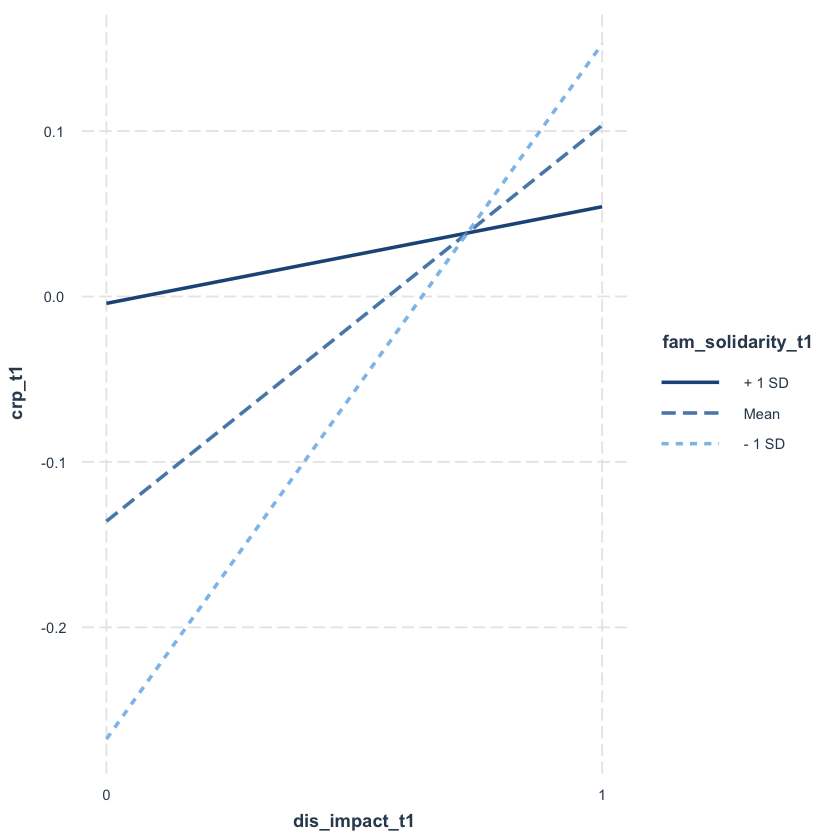

JOHNSON-NEYMAN INTERVAL

When fam_solidarity_t1 is INSIDE the interval [10.44, 64.26], the
slope of life_dis_t1 is p < .05.

Note: The range of observed values of fam_solidarity_t1 is [1.56,
16.00]

SIMPLE SLOPES ANALYSIS

Slope of life_dis_t1 when fam_solidarity_t1 =  7.837985 (- 1 SD): 

  Est.   S.E.   t val.      p
------ ------ -------- ------
  0.02   0.05     0.36   0.72

Slope of life_dis_t1 when fam_solidarity_t1 = 10.763637 (Mean): 

  Est.   S.E.   t val.      p
------ ------ -------- ------
  0.08   0.04     2.13   0.03

Slope of life_dis_t1 when fam_solidarity_t1 = 13.689288 (+ 1 SD): 

  Est.   S.E.   t val.      p
------ ------ -------- ------
  0.15   0.06     2.61   0.01


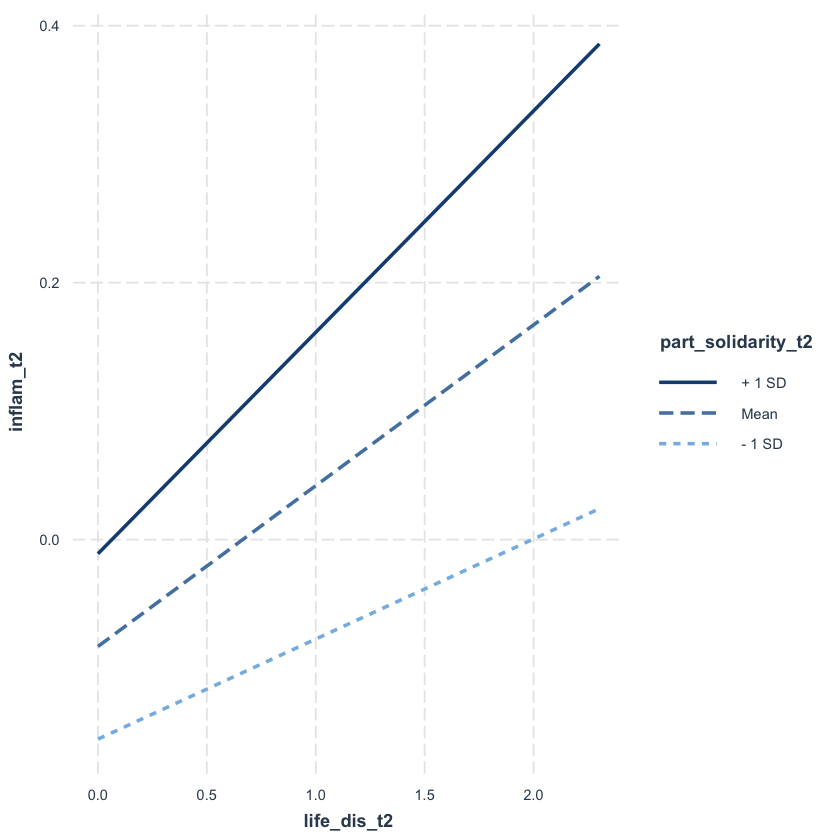

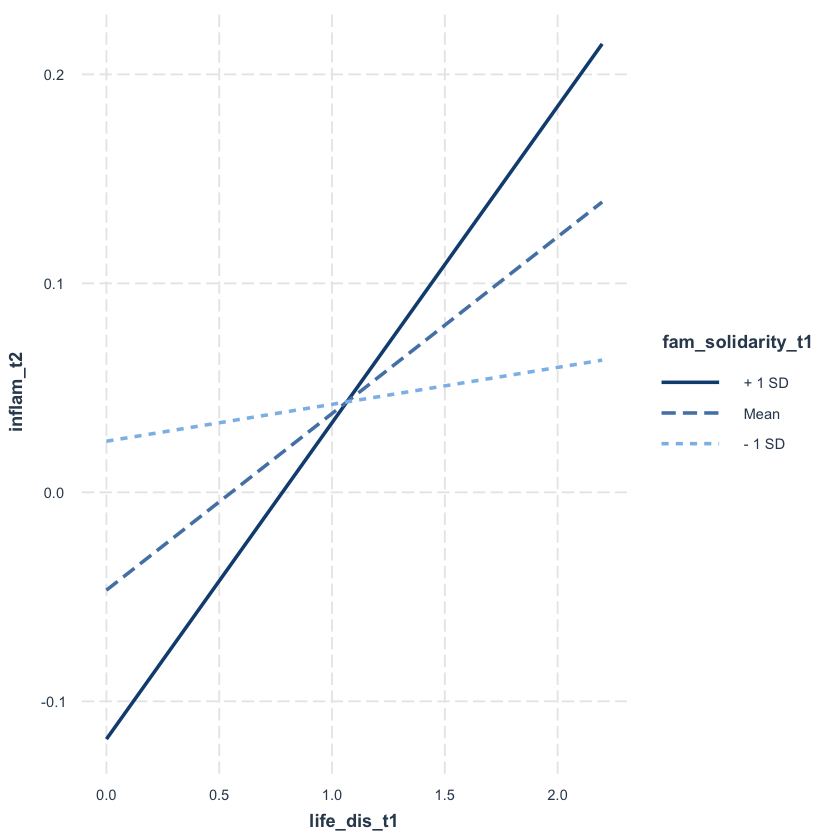

In [135]:
mod1 <- (lm(crp_t1 ~ age_t1 + bmi_t1 + smoke_t1 + dis_impact_t1 * fam_solidarity_t1, data = dat))
probe_interaction(mod1, pred = "dis_impact_t1", modx = "fam_solidarity_t1")

mode2 <- (lm(inflam_t2 ~ age_t2 + bmi_t2 + smoke_t2 + life_dis_t2 * part_solidarity_t2, data = dat))
probe_interaction(mode2, pred = "life_dis_t2", modx = "part_solidarity_t2")

mod3 <- (lm(inflam_t2 ~ age_t2 + bmi_t2 + smoke_t2 + inflam_t1 + life_dis_t1 * fam_solidarity_t1, data = dat))
probe_interaction(mod3, pred = "life_dis_t1", modx = "fam_solidarity_t1")

From the graphs above, we can see that the relation between impact of discrimination at Time 1 and CRP at Time 1 is the strongest among those with the lowest family solidarity, which corroborates my hypothesis. However, countering my hypotheses, the relation between life discrimination at Time 2 and inflammation composite at Time 2 is the strongest among those with the highest partner solidarity, and the prospective change relation between life discrimination at Time 1 and inflammation composite at Time 2 is the strongest among those with the highest family solidarity.

# Conclusion

This project sets out to examine three questions their related hypotheses, and we find some evidence regarding all three hypotheses. First, xperiences of life time discrimination are associated with higher levels of low-grade inflammation ten years later and in terms of prospective change, even when controlling for covariates such as smoking status and age. Second, here was some evidence that sleep quality mediates the relation between discrimination and inflammation, such that discrimination leads to worse sleep quality, which in turn contributes to more inflammation. Finally, there was mixed and conflicting evidence for moderation. No evidence exists for gender being a moderator, and more social connections sometimes buffer the negative effect of discrimination on inflammation, sometimes exacerbate it. In conclusion, more caution is needed to interpret the current findings. We also need more studies to delineate the effect of social connections on stressors and health outcomes.